#### Master Thesis 2024 - Diksha Acharya

# 4 - 30 year Climatology on daily data

    - 1940 to 1969
    - 1970 to 1999
    - 2000 to 2023

---

Imports and tables

In [1]:
# Import 
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import os
from shapely.geometry import Point

In [2]:
# Indian states shapefile
shapefile_path = "Indian_States"
Indian_states = gpd.read_file(shapefile_path)

In [3]:
# Daily T file
file_T_daily = "India_T_daily_stats.nc"
T_daily = xr.open_dataset(file_T_daily)
T_daily

<xarray.Dataset>
Dimensions:         (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude       (longitude) float32 68.0 68.25 68.5 ... 97.25 97.5 97.75
  * latitude        (latitude) float32 38.0 37.75 37.5 37.25 ... 7.75 7.5 7.25
  * time            (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_temp  (time, latitude, longitude) float32 ...
    daily_min_temp  (time, latitude, longitude) float32 ...
    daily_avg_temp  (time, latitude, longitude) float32 ...

In [4]:
# Daily RH file
file_RH_daily = "India_RH_daily_stats.nc"
RH_daily = xr.open_dataset(file_RH_daily)
RH_daily

<xarray.Dataset>
Dimensions:       (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude     (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude      (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * time          (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_RH  (time, latitude, longitude) float32 ...
    daily_min_RH  (time, latitude, longitude) float32 ...
    daily_avg_RH  (time, latitude, longitude) float32 ...

In [5]:
# Daily HI file
file_HI_daily = "India_HI_adjustment_daily_stats.nc"
HI_daily = xr.open_dataset(file_HI_daily)
HI_daily

<xarray.Dataset>
Dimensions:       (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude     (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude      (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * time          (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_HI  (time, latitude, longitude) float32 ...
    daily_min_HI  (time, latitude, longitude) float32 ...
    daily_avg_HI  (time, latitude, longitude) float32 ...

In [15]:
# State capitals
capitals_df = pd.DataFrame({
    "State": [
        "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
        "Goa", "Gujarat", "Haryana", "Himachal Pradesh","Jammu Kashmir", "Jharkhand",
        "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
        "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
        "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
        "Uttar Pradesh", "Uttarakhand", "West Bengal"
    ],
    "Capital": [
        "Amaravati", "Itanagar", "Dispur", "Patna", "Raipur",
        "Panaji", "Gandhinagar", "Chandigarh", "Shimla", "Jammu", "Ranchi",
        "Bengaluru", "Thiruvananthapuram", "Bhopal", "Mumbai", "Imphal",
        "Shillong", "Aizawl", "Kohima", "Bhubaneswar", "Chandigarh",
        "Jaipur", "Gangtok", "Chennai", "Hyderabad", "Agartala",
        "Lucknow", "Dehradun", "Kolkata"
    ],
    "Latitude": [
        14.9062, 28.0844, 26.5438, 25.5941, 21.2514,
        15.4909, 23.2156, 29.5333, 32.1048, 34.5, 23.3441,
        13.9716, 8.9241, 23.2599, 19.0760, 24.8170,
        25.5788, 22.7271, 25.9751, 20.2961, 30.7333,
        26.9124, 27.3314, 11.0827, 17.3850, 23.8315,
        26.8467, 30.3165, 22.5726
    ],
    "Longitude": [
        79.6480, 93.6053, 91.7898, 85.1376, 81.6296,
        73.8317, 72.6369, 76.5794, 77.1734, 77, 85.3096,
        75.6946, 76.5366, 77.4126, 74.8777, 93.9368,
        91.8933, 92.7176, 94.1086, 84.8245, 75.7794,
        73.7873, 88.6065, 78.2707, 78.8867, 91.2868,
        80.9462, 79.2322, 88.3639
    ]
})

---
4.1 - 2m temperature

In [6]:
# Select the periods of interest
period1_T = T_daily.sel(time=slice('1940-01-01', '1969-12-31'))
period2_T = T_daily.sel(time=slice('1970-01-01', '1999-12-31'))
period3_T = T_daily.sel(time=slice('2000-01-01', '2023-12-31'))

# Calculate the climatologies by averaging over time
climatology1_T = period1_T.mean(dim='time')
climatology2_T = period2_T.mean(dim='time')
climatology3_T = period3_T.mean(dim='time')


In [7]:
# Daily max climatology
climatology1_max_T = climatology1_T['daily_max_temp']
climatology2_max_T = climatology2_T['daily_max_temp']
climatology3_max_T = climatology3_T['daily_max_temp']

In [8]:
print(climatology1_max_T.max().values)
print(climatology2_max_T.max().values)
print(climatology3_max_T.max().values)

34.51468276977539
35.082305908203125
35.5313720703125


In [9]:
# Daily min climatology
climatology1_min_T = climatology1_T['daily_min_temp']
climatology2_min_T = climatology2_T['daily_min_temp']
climatology3_min_T = climatology3_T['daily_min_temp']

In [11]:
print(climatology1_min_T.min().values)
print(climatology2_min_T.min().values)
print(climatology3_min_T.min().values)

-23.558046340942383
-23.101947784423828
-22.06491470336914


In [10]:
# Daily avg climatology
climatology1_avg_T = climatology1_T['daily_avg_temp']
climatology2_avg_T = climatology2_T['daily_avg_temp']
climatology3_avg_T = climatology3_T['daily_avg_temp']

In [13]:
print(climatology1_max_T.mean())
print(climatology2_max_T.mean())
print(climatology3_max_T.mean())

<xarray.DataArray 'daily_max_temp' ()>
array(27.214209, dtype=float32)
<xarray.DataArray 'daily_max_temp' ()>
array(27.497732, dtype=float32)
<xarray.DataArray 'daily_max_temp' ()>
array(28.023905, dtype=float32)


In [14]:
print(climatology1_min_T.mean())
print(climatology2_min_T.mean())
print(climatology3_min_T.mean())

<xarray.DataArray 'daily_min_temp' ()>
array(17.257524, dtype=float32)
<xarray.DataArray 'daily_min_temp' ()>
array(17.53698, dtype=float32)
<xarray.DataArray 'daily_min_temp' ()>
array(18.2249, dtype=float32)


In [15]:
print(climatology1_avg_T.mean())
print(climatology2_avg_T.mean())
print(climatology3_avg_T.mean())

<xarray.DataArray 'daily_avg_temp' ()>
array(21.859451, dtype=float32)
<xarray.DataArray 'daily_avg_temp' ()>
array(22.238132, dtype=float32)
<xarray.DataArray 'daily_avg_temp' ()>
array(22.715601, dtype=float32)


4.1.1 - Max Climatologies T°

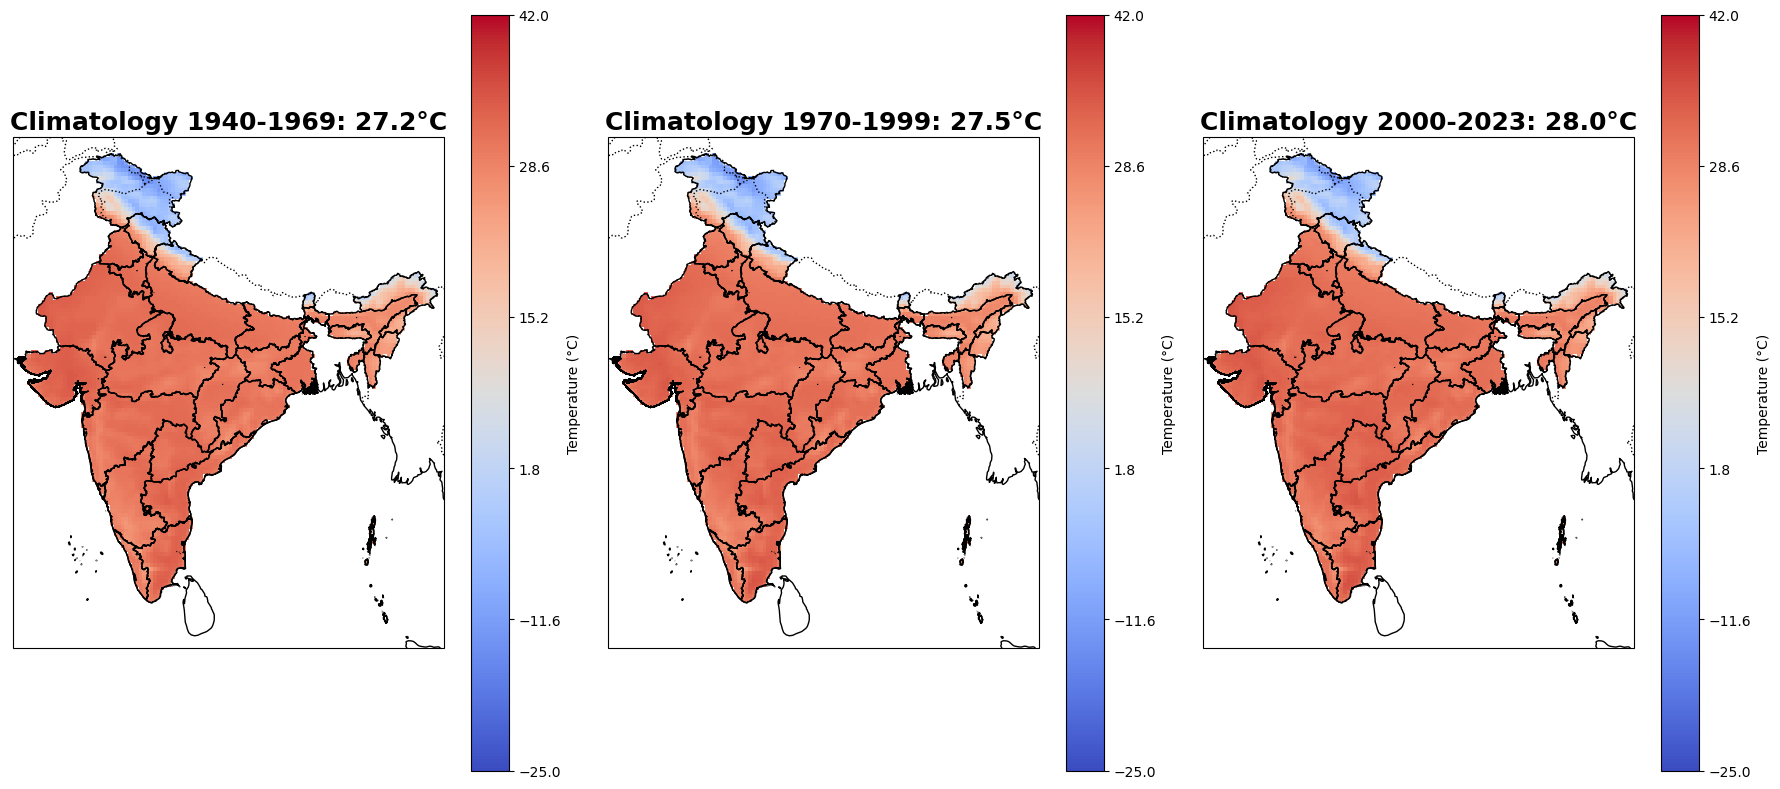

In [16]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_max_T.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_max_T.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_max_T.mean().values:.1f}°C'
]
# List of climatology datasets to plot
climatologies = [climatology1_max_T, climatology2_max_T, climatology3_max_T]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4.1.2 - Min Climatologies T°

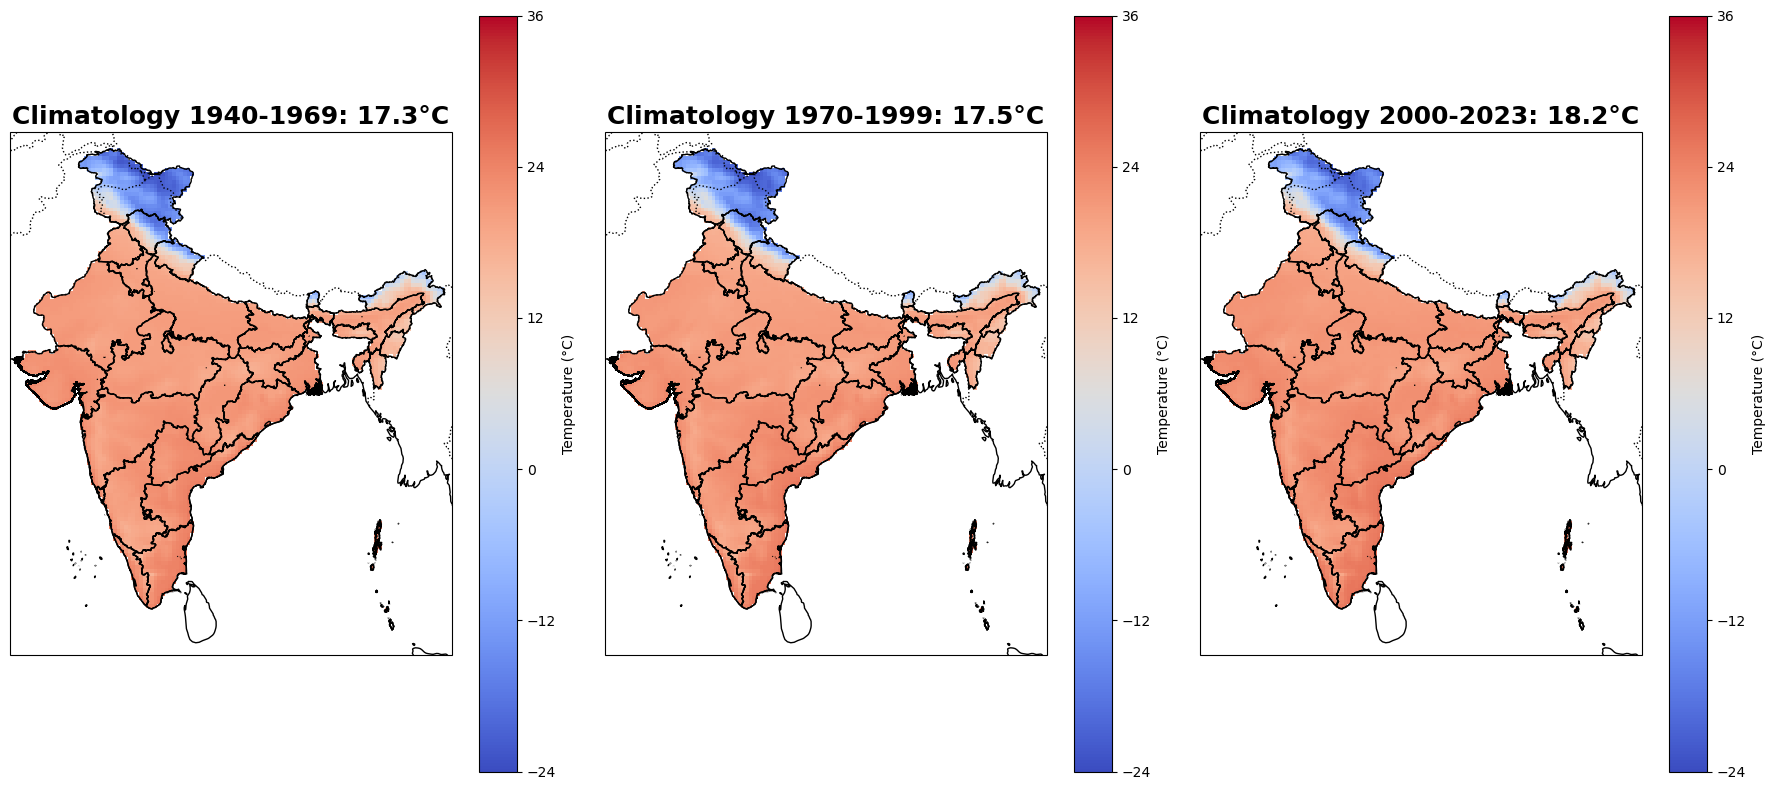

In [17]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_min_T.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_min_T.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_min_T.mean().values:.1f}°C'
]

# List of climatology datasets to plot
climatologies = [climatology1_min_T, climatology2_min_T, climatology3_min_T]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-24, vmax=36, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-24, 36, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4.1.3 - Average climatologies T°

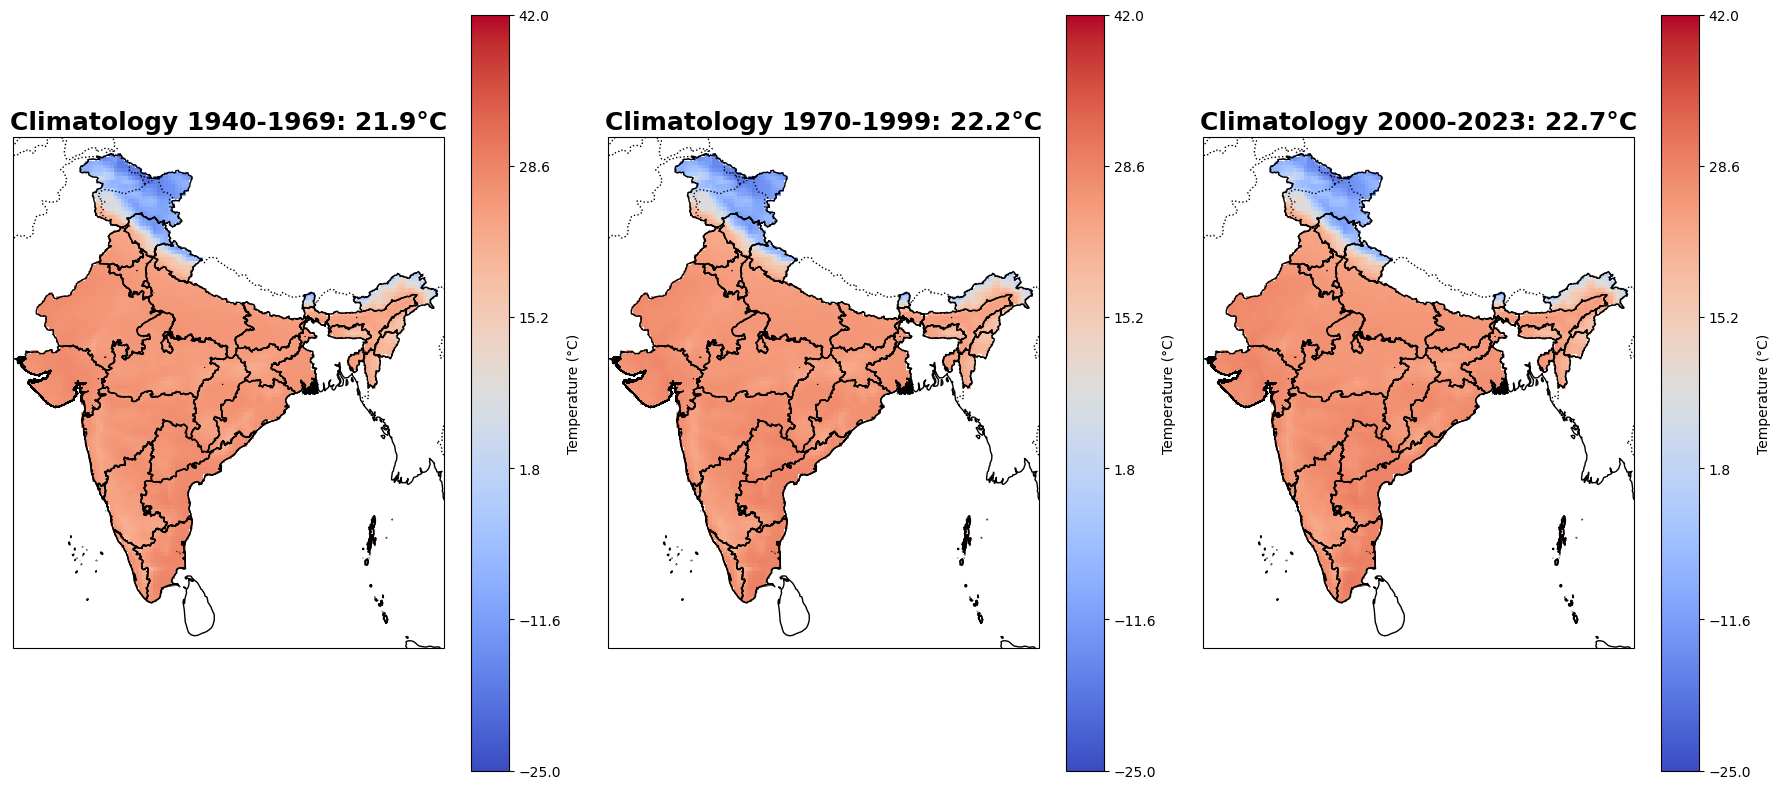

In [18]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_avg_T.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_avg_T.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_avg_T.mean().values:.1f}°C'
]

# List of climatology datasets to plot
climatologies = [climatology1_avg_T, climatology2_avg_T, climatology3_avg_T]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


---
4.2 - Relative humidity

In [8]:
# Select the periods of interest
period1_RH = RH_daily.sel(time=slice('1940-01-01', '1969-12-31'))
period2_RH = RH_daily.sel(time=slice('1970-01-01', '1999-12-31'))
period3_RH = RH_daily.sel(time=slice('2000-01-01', '2023-12-31'))

# Calculate the climatologies by averaging over time
climatology1_RH = period1_RH.mean(dim='time')
climatology2_RH = period2_RH.mean(dim='time')
climatology3_RH = period3_RH.mean(dim='time')

In [9]:
# Daily max climatology
climatology1_max_RH = climatology1_RH['daily_max_RH']
climatology2_max_RH = climatology2_RH['daily_max_RH']
climatology3_max_RH = climatology3_RH['daily_max_RH']

In [13]:
# Daily min climatology
climatology1_min_RH = climatology1_RH['daily_min_RH']
climatology2_min_RH = climatology2_RH['daily_min_RH']
climatology3_min_RH = climatology3_RH['daily_min_RH']

In [14]:
# Daily avg climatology
climatology1_avg_RH = climatology1_RH['daily_avg_RH']
climatology2_avg_RH = climatology2_RH['daily_avg_RH']
climatology3_avg_RH = climatology3_RH['daily_avg_RH']

In [23]:
print(climatology1_max_RH.mean().values)
print(climatology2_max_RH.mean().values)
print(climatology3_max_RH.mean().values)

76.16851
77.700356
79.38387


In [24]:
print(climatology1_min_RH.mean().values)
print(climatology2_min_RH.mean().values)
print(climatology3_min_RH.mean().values)

43.982365
44.644394
45.834007


In [25]:
print(climatology1_avg_RH.mean().values)
print(climatology2_avg_RH.mean().values)
print(climatology3_avg_RH.mean().values)

60.037075
61.120605
62.60711


4.2.1  - Max climatology RH

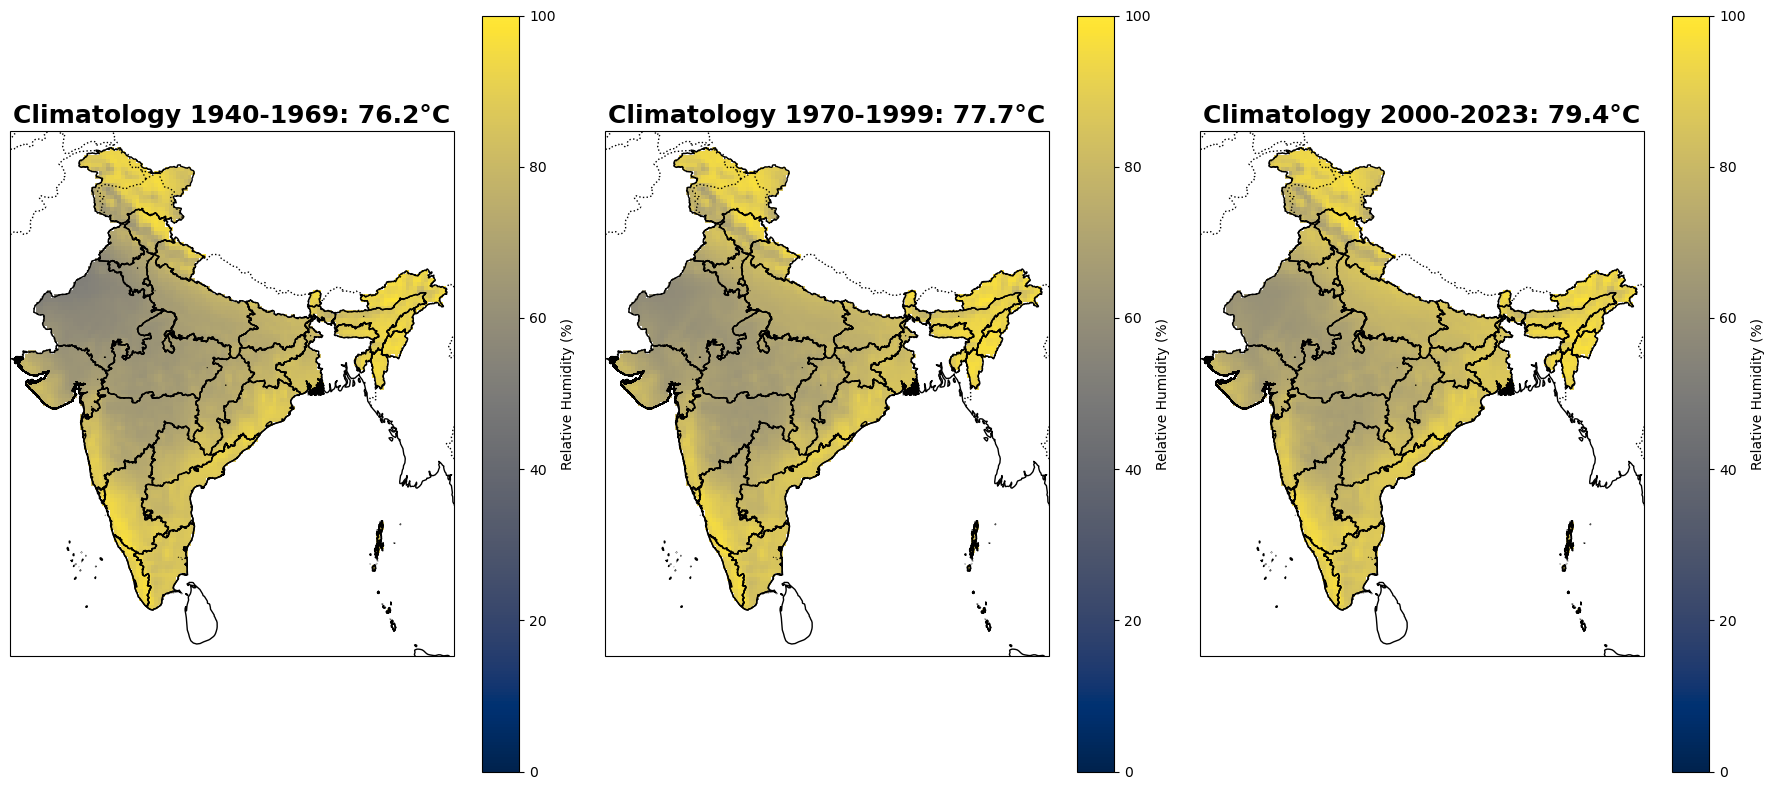

In [26]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_max_RH.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_max_RH.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_max_RH.mean().values:.1f}°C'
]

# List of climatology datasets to plot
climatologies = [climatology1_max_RH, climatology2_max_RH, climatology3_max_RH]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=0, vmax=100, cbar_kwargs={'label': 'Relative Humidity (%)','ticks': np.linspace(0, 100, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4.2.2 - Min Climatology RH

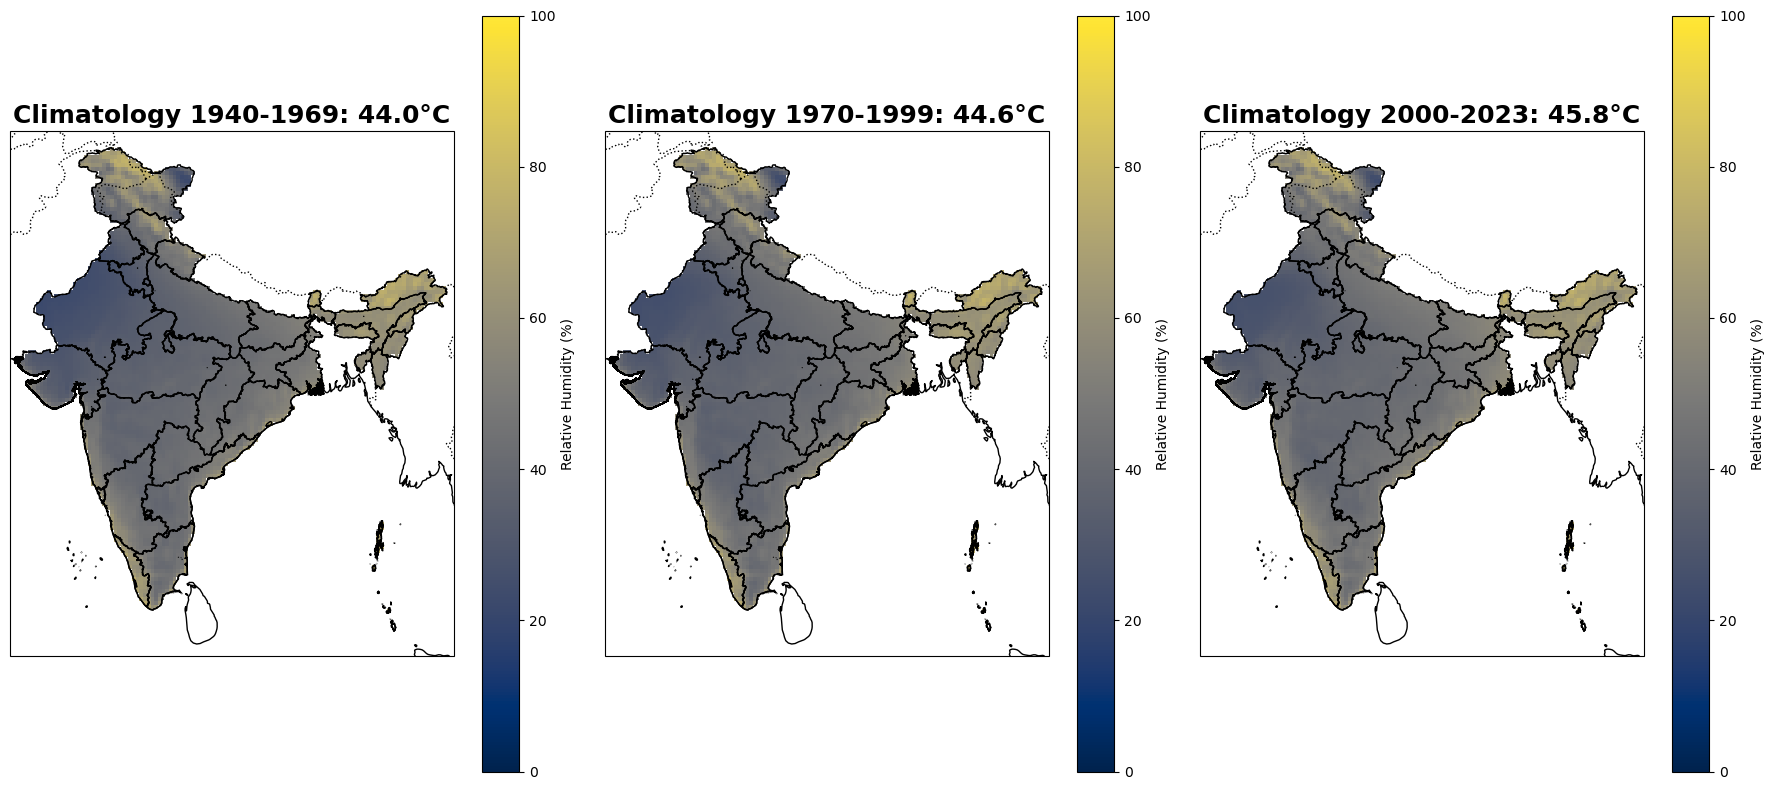

In [27]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_min_RH.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_min_RH.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_min_RH.mean().values:.1f}°C'
]
# List of climatology datasets to plot
climatologies = [climatology1_min_RH, climatology2_min_RH, climatology3_min_RH]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=0, vmax=100, cbar_kwargs={'label': 'Relative Humidity (%)','ticks': np.linspace(0, 100, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4.2.3 - Average Climatology RH

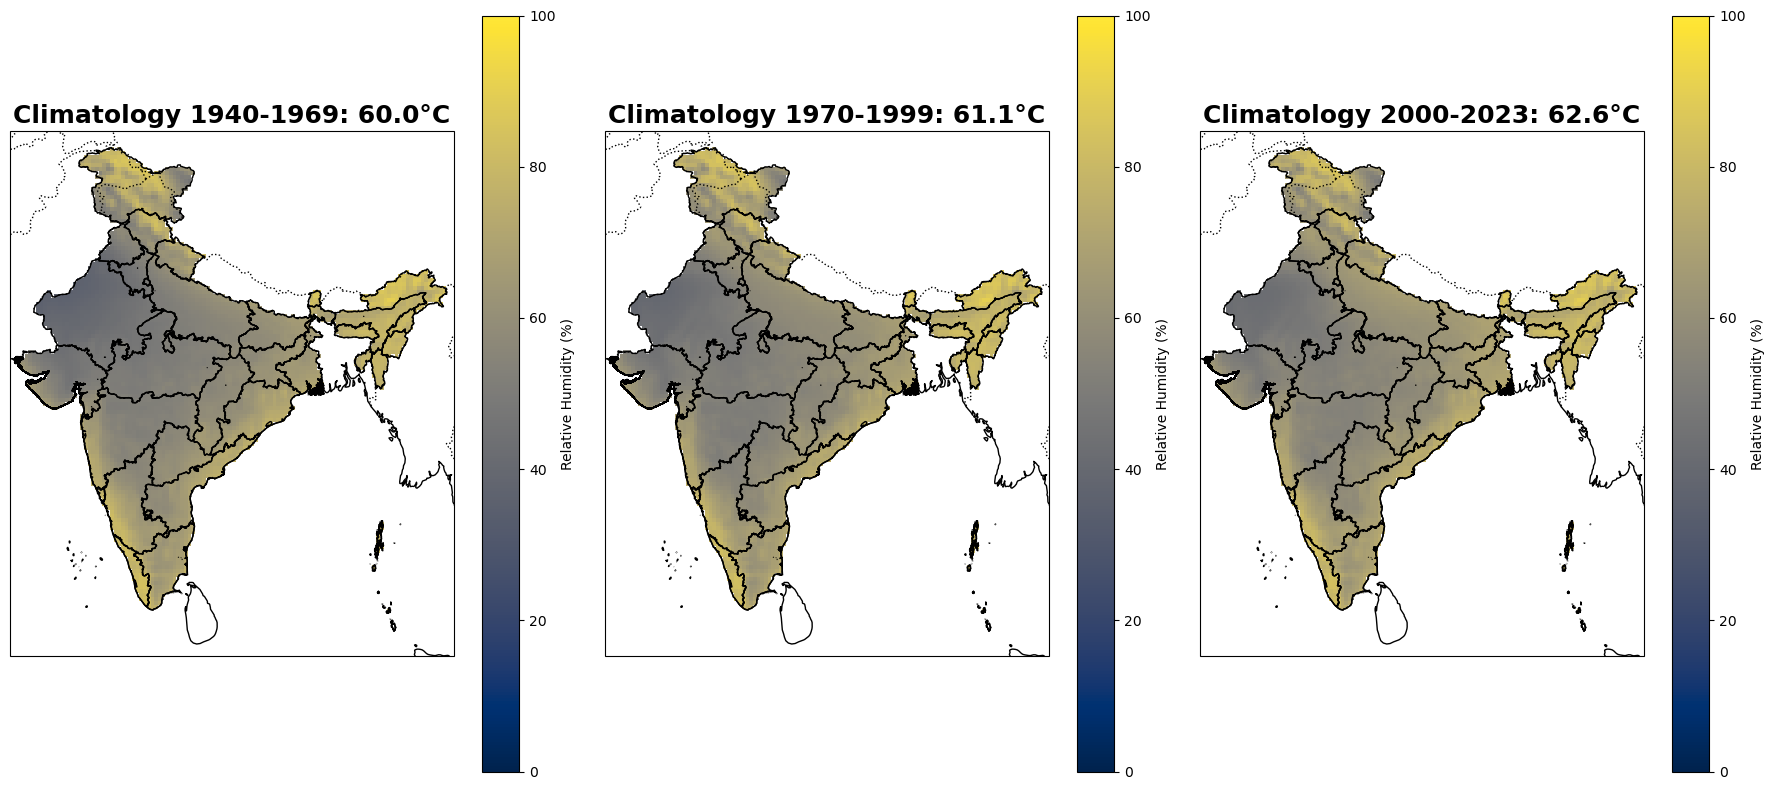

In [28]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_avg_RH.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_avg_RH.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_avg_RH.mean().values:.1f}°C'
]
# List of climatology datasets to plot
climatologies = [climatology1_avg_RH, climatology2_avg_RH, climatology3_avg_RH]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=0, vmax=100, cbar_kwargs={'label': 'Relative Humidity (%)','ticks': np.linspace(0, 100, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---
4.3 - Heat Index

In [10]:
# Select the periods of interest
period1_HI = HI_daily.sel(time=slice('1940-01-01', '1969-12-31'))
period2_HI = HI_daily.sel(time=slice('1970-01-01', '1999-12-31'))
period3_HI = HI_daily.sel(time=slice('2000-01-01', '2023-12-31'))

# Calculate the climatologies by averaging over time
climatology1_HI = period1_HI.mean(dim='time')
climatology2_HI = period2_HI.mean(dim='time')
climatology3_HI = period3_HI.mean(dim='time')

In [11]:
# Daily max climatology
climatology1_max_HI = climatology1_HI['daily_max_HI']
climatology2_max_HI = climatology2_HI['daily_max_HI']
climatology3_max_HI = climatology3_HI['daily_max_HI']

In [8]:
# Daily avg climatology
climatology1_avg_HI = climatology1_HI['daily_avg_HI']
climatology2_avg_HI = climatology2_HI['daily_avg_HI']
climatology3_avg_HI = climatology3_HI['daily_avg_HI']

In [9]:
# Daily min climatology
climatology1_min_HI = climatology1_HI['daily_min_HI']
climatology2_min_HI = climatology2_HI['daily_min_HI']
climatology3_min_HI = climatology3_HI['daily_min_HI']

In [10]:
print(climatology1_max_HI.mean().values)
print(climatology2_max_HI.mean().values)
print(climatology3_max_HI.mean().values)

28.86822
29.462442
30.371563


In [11]:
print(climatology1_min_HI.mean().values)
print(climatology2_min_HI.mean().values)
print(climatology3_min_HI.mean().values)

18.629787
19.01609
19.864748


In [12]:
print(climatology1_avg_HI.mean().values)
print(climatology2_avg_HI.mean().values)
print(climatology3_avg_HI.mean().values)

23.351387
23.956083
24.690968


In [13]:
print(climatology1_max_HI.max().values)
print(climatology2_max_HI.max().values)
print(climatology3_max_HI.max().values)
print(climatology1_min_HI.min().values)
print(climatology2_min_HI.min().values)
print(climatology3_min_HI.min().values)

37.31184005737305
39.40841293334961
41.28302001953125
-0.7031147480010986
-0.44491901993751526
-0.32095587253570557


4.3.1  - HI Max climatology

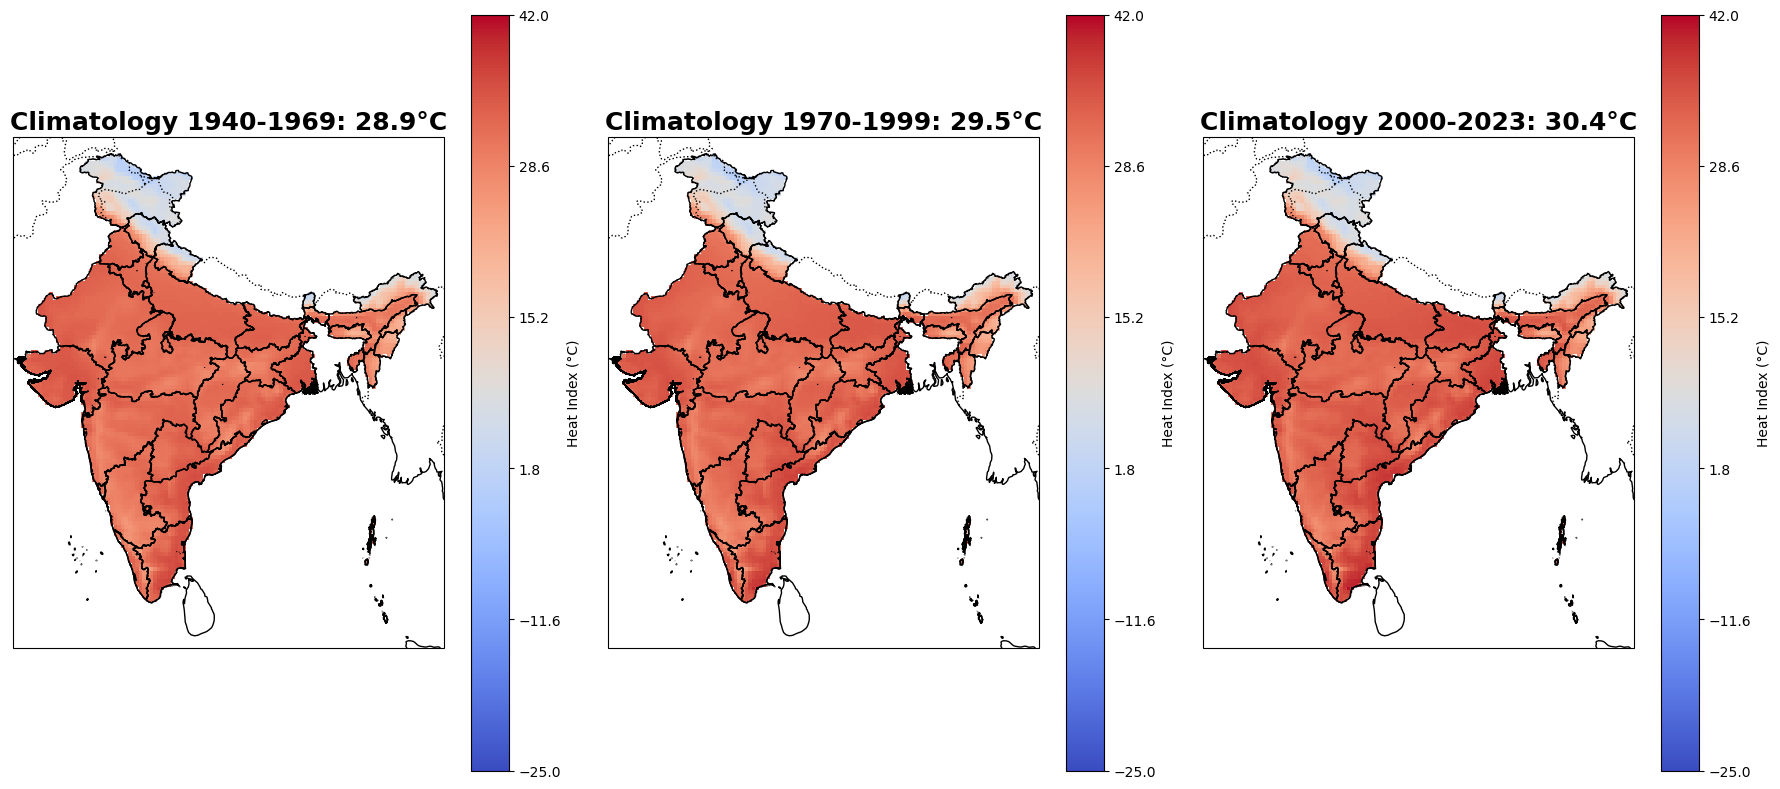

In [14]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_max_HI.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_max_HI.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_max_HI.mean().values:.1f}°C'
]

# List of climatology datasets to plot
climatologies = [climatology1_max_HI, climatology2_max_HI, climatology3_max_HI]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Heat Index (°C)','ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

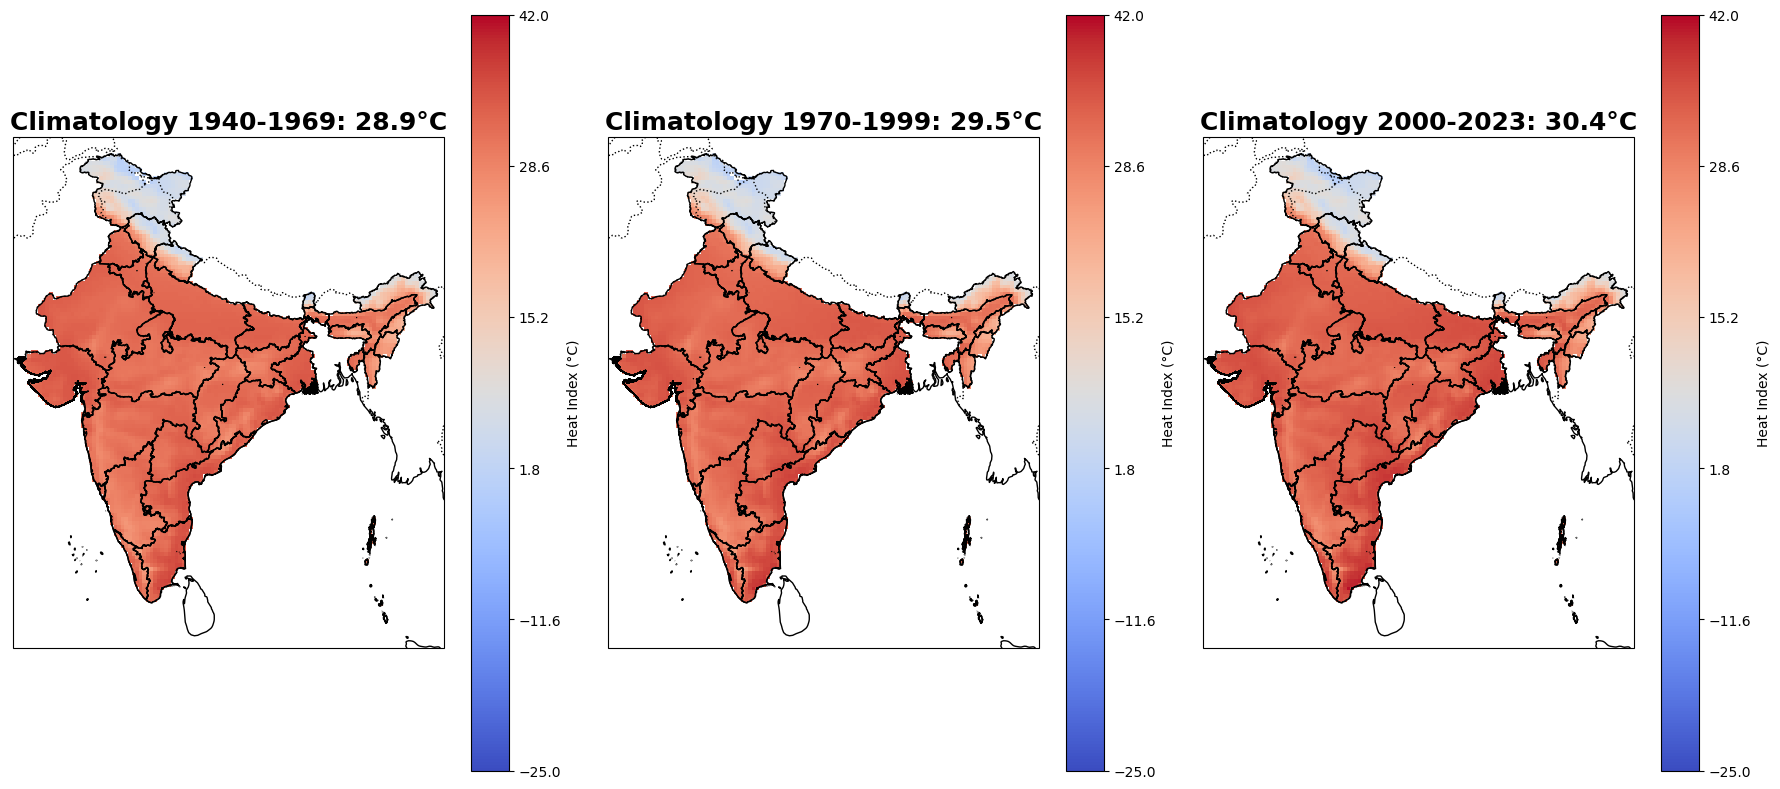

In [15]:
# Filter out HI values under 0
climatologies = [
    climatology1_max_HI.where(climatology1_max_HI >= 0),
    climatology2_max_HI.where(climatology2_max_HI >= 0),
    climatology3_max_HI.where(climatology3_max_HI >= 0)
]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_max_HI.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_max_HI.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_max_HI.mean().values:.1f}°C'
]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Heat Index (°C)', 'ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

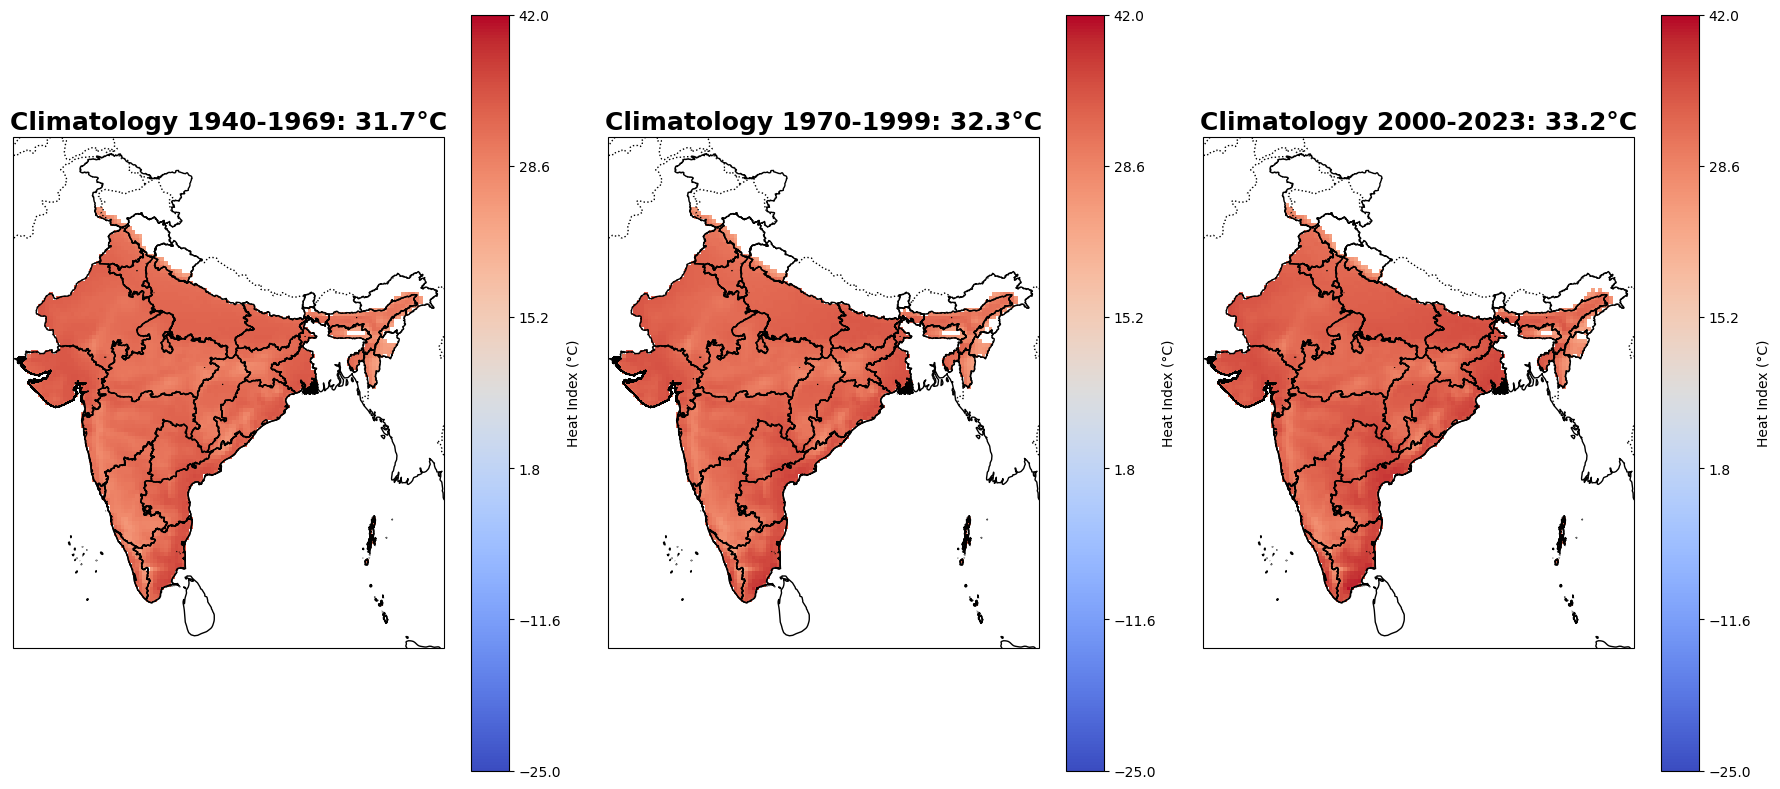

In [12]:
# Filter out daily maximum HI values where the corresponding daily maximum temperature is less than 0
filtered_climatologies = [
    climatology1_max_HI.where(climatology1_max_T >= 23),
    climatology2_max_HI.where(climatology2_max_T >= 23),
    climatology3_max_HI.where(climatology3_max_T >= 23)
]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {filtered_climatologies[0].mean().values:.1f}°C',
    f'Climatology 1970-1999: {filtered_climatologies[1].mean().values:.1f}°C',
    f'Climatology 2000-2023: {filtered_climatologies[2].mean().values:.1f}°C'
]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the filtered heat index for the given period
    filtered_climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Heat Index (°C)', 'ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4.3.2 - Min Climatology

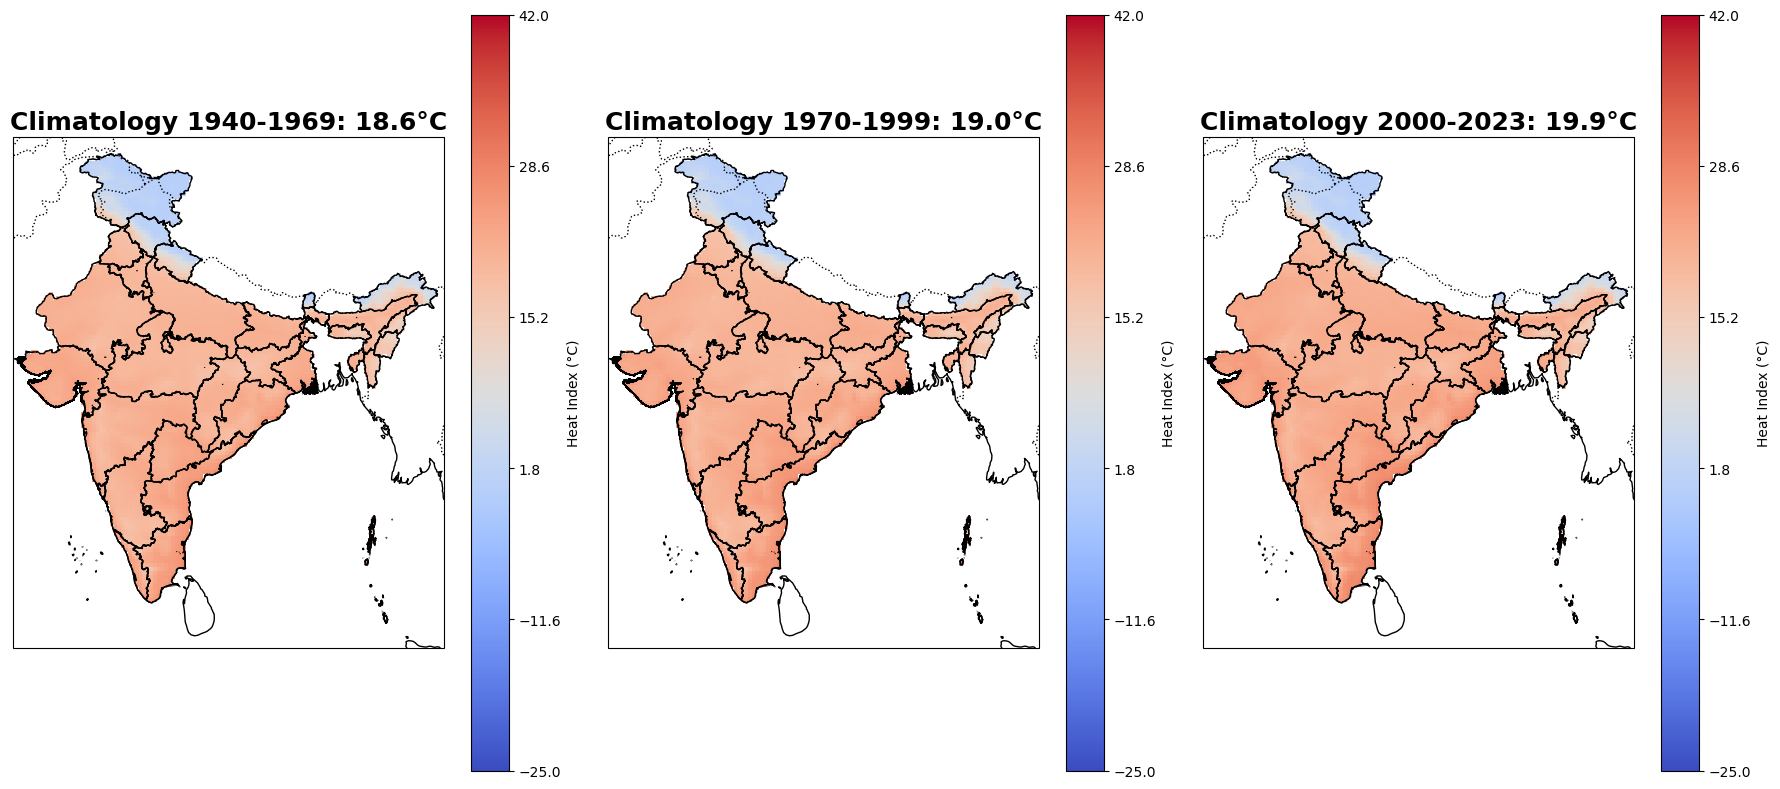

In [17]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_min_HI.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_min_HI.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_min_HI.mean().values:.1f}°C'
]
# List of climatology datasets to plot
climatologies = [climatology1_min_HI, climatology2_min_HI, climatology3_min_HI]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Heat Index (°C)','ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4.3.3 - Average Climatology

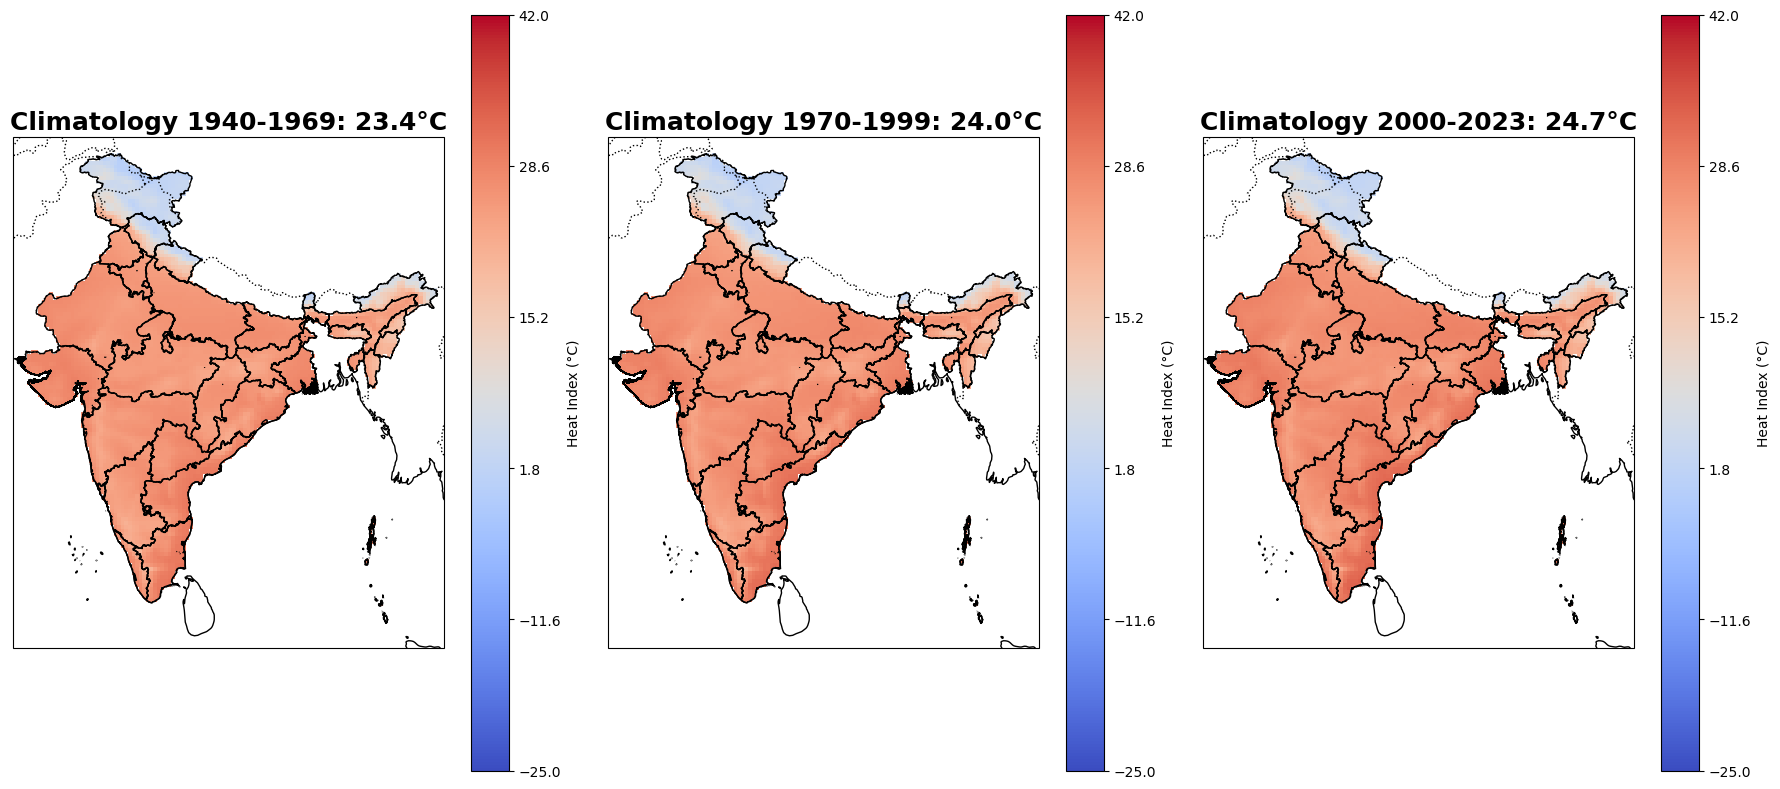

In [18]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = [
    f'Climatology 1940-1969: {climatology1_avg_HI.mean().values:.1f}°C',
    f'Climatology 1970-1999: {climatology2_avg_HI.mean().values:.1f}°C',
    f'Climatology 2000-2023: {climatology3_avg_HI.mean().values:.1f}°C'
]
# List of climatology datasets to plot
climatologies = [climatology1_avg_HI, climatology2_avg_HI, climatology3_avg_HI]

# Plot each climatology on the subplots
for i, ax in enumerate(axes):
    # Plot the average temperature for the given period
    climatologies[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-25, vmax=42, cbar_kwargs={'label': 'Heat Index (°C)','ticks': np.linspace(-25, 42, num=6)})
    
    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---
4.4 - Climatology evolution (climatology3 - climatology1) on daily maximum

4.4.1 T° evolution based on daily maximum

In [13]:
# Calculate the differences between the climatologies
climatology_max_diff_T_a = (climatology2_max_T - climatology1_max_T) 
climatology_max_diff_T_b = (climatology3_max_T - climatology1_max_T) 

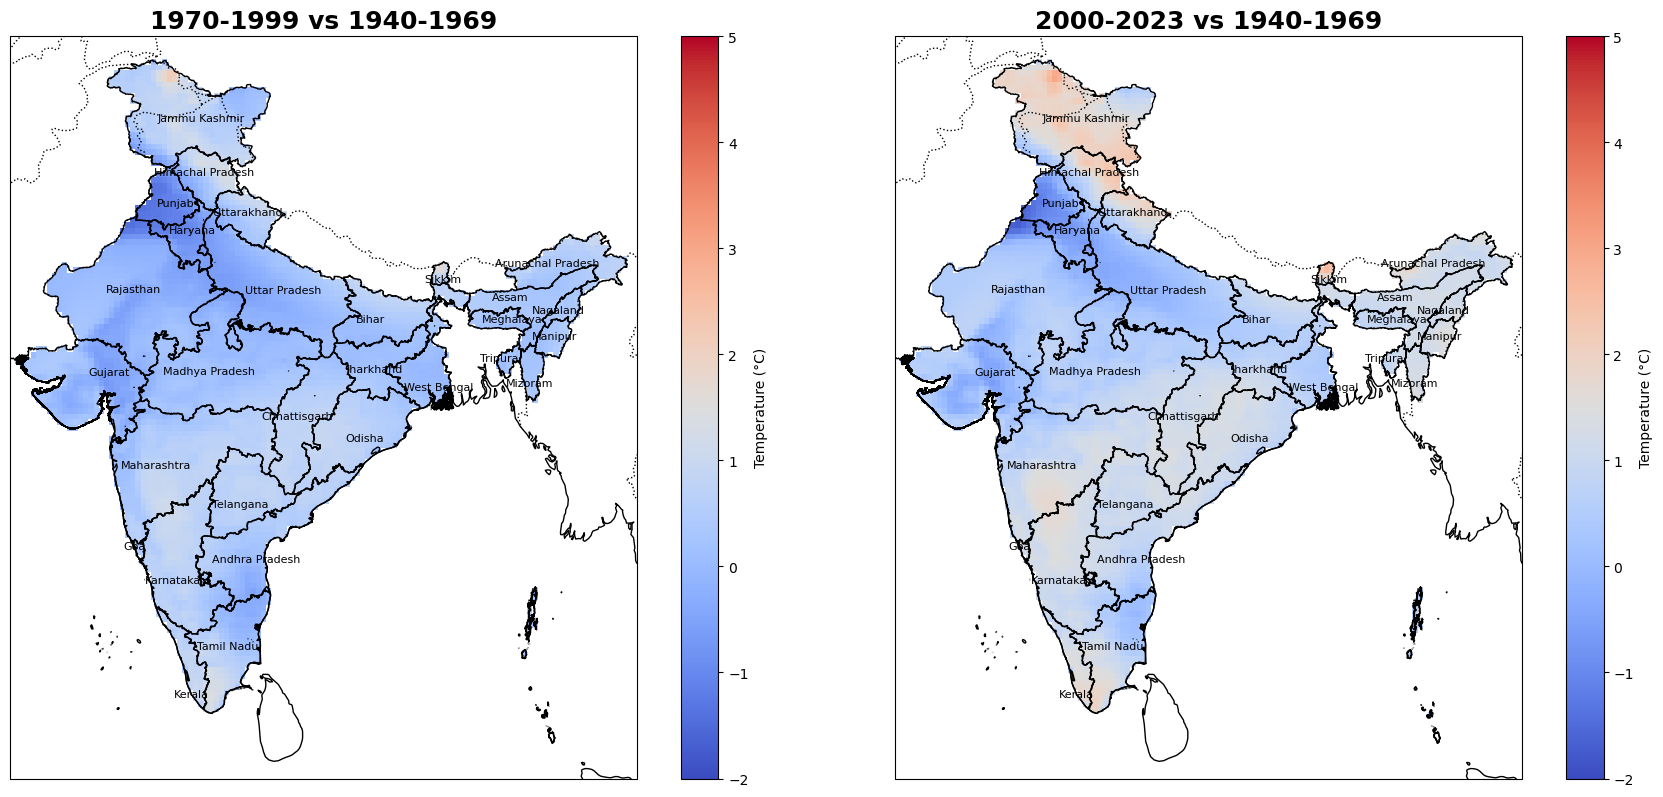

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969',
          '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_T_a, climatology_max_diff_T_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-2, vmax=5, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-2, 5, num=8)})
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [21]:
print(climatology_max_diff_T_a.min().values)
print(climatology_max_diff_T_b.min().values)
print(climatology_max_diff_T_a.max().values)
print(climatology_max_diff_T_b.max().values)

-1.422506332397461
-1.7168464660644531
2.171971321105957
2.9953489303588867


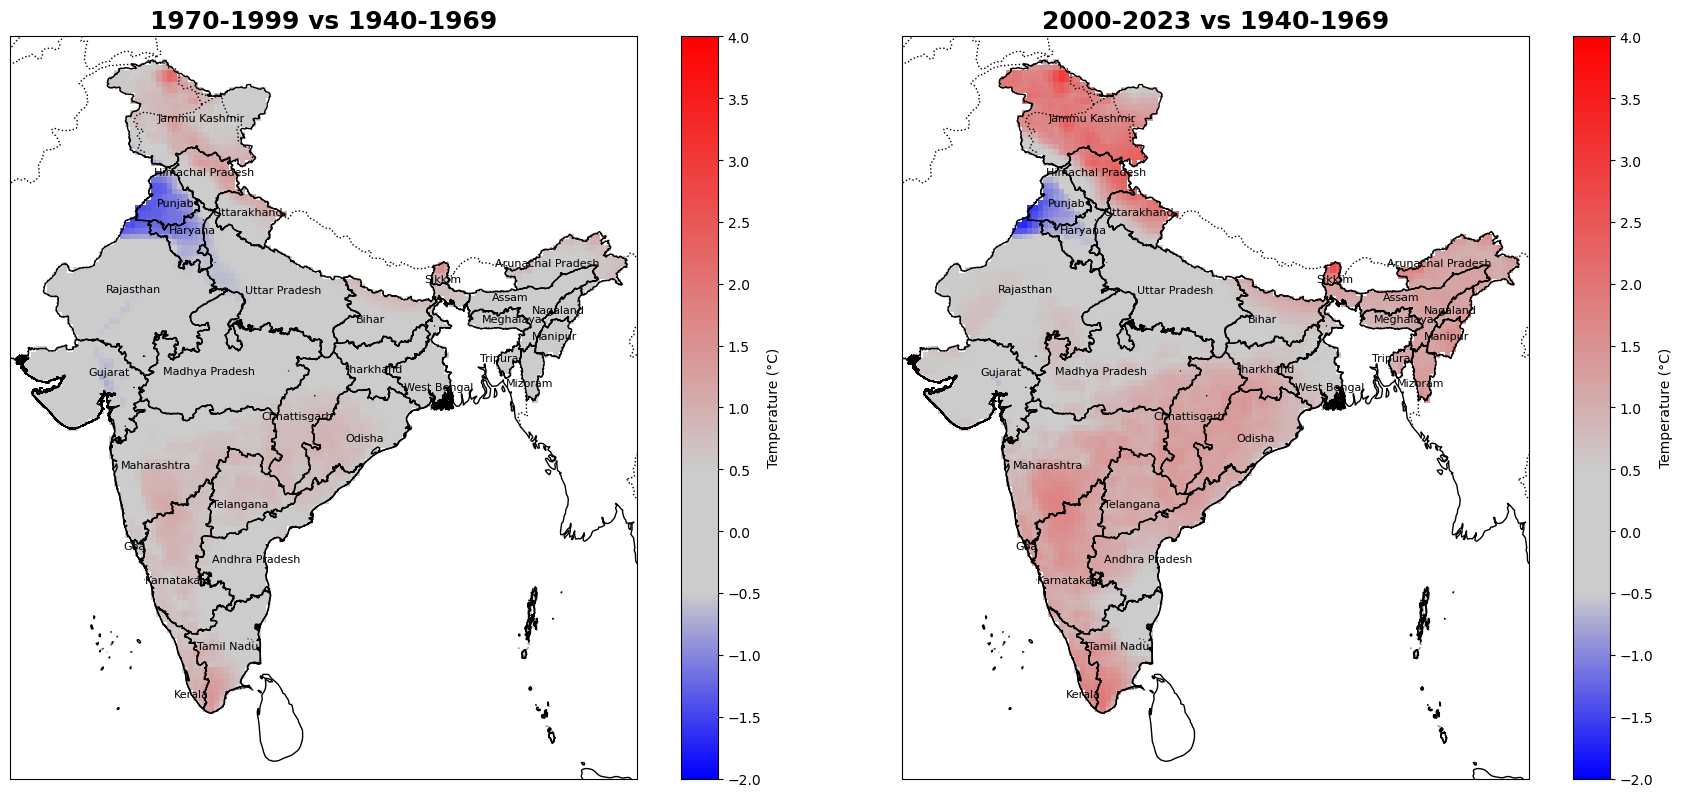

In [30]:
# Create custom colormap
colors = ['#0000FF',  # Blue at -1.5
          '#CCCCCC',  # Gray at -0.5
          '#CCCCCC',  # Gray at 0.5
          '#FF0000']  # Red at 4.0

# Define the positions of these colors on a scale from 0 to 1
positions = np.array([-2, -0.5, 0.5, 4.0])
positions = (positions - positions.min()) / (positions.max() - positions.min())

# Create the custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_coolwarm', list(zip(positions, colors)))

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969', '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_T_a, climatology_max_diff_T_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(
        ax=ax, 
        transform=ccrs.PlateCarree(), 
        cmap=custom_cmap,
        vmin=-2,
        vmax=4.0,
        cbar_kwargs={
            'label': 'Temperature (°C)',
            'ticks': np.linspace(-2, 4.0, 13)
        }
    )
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

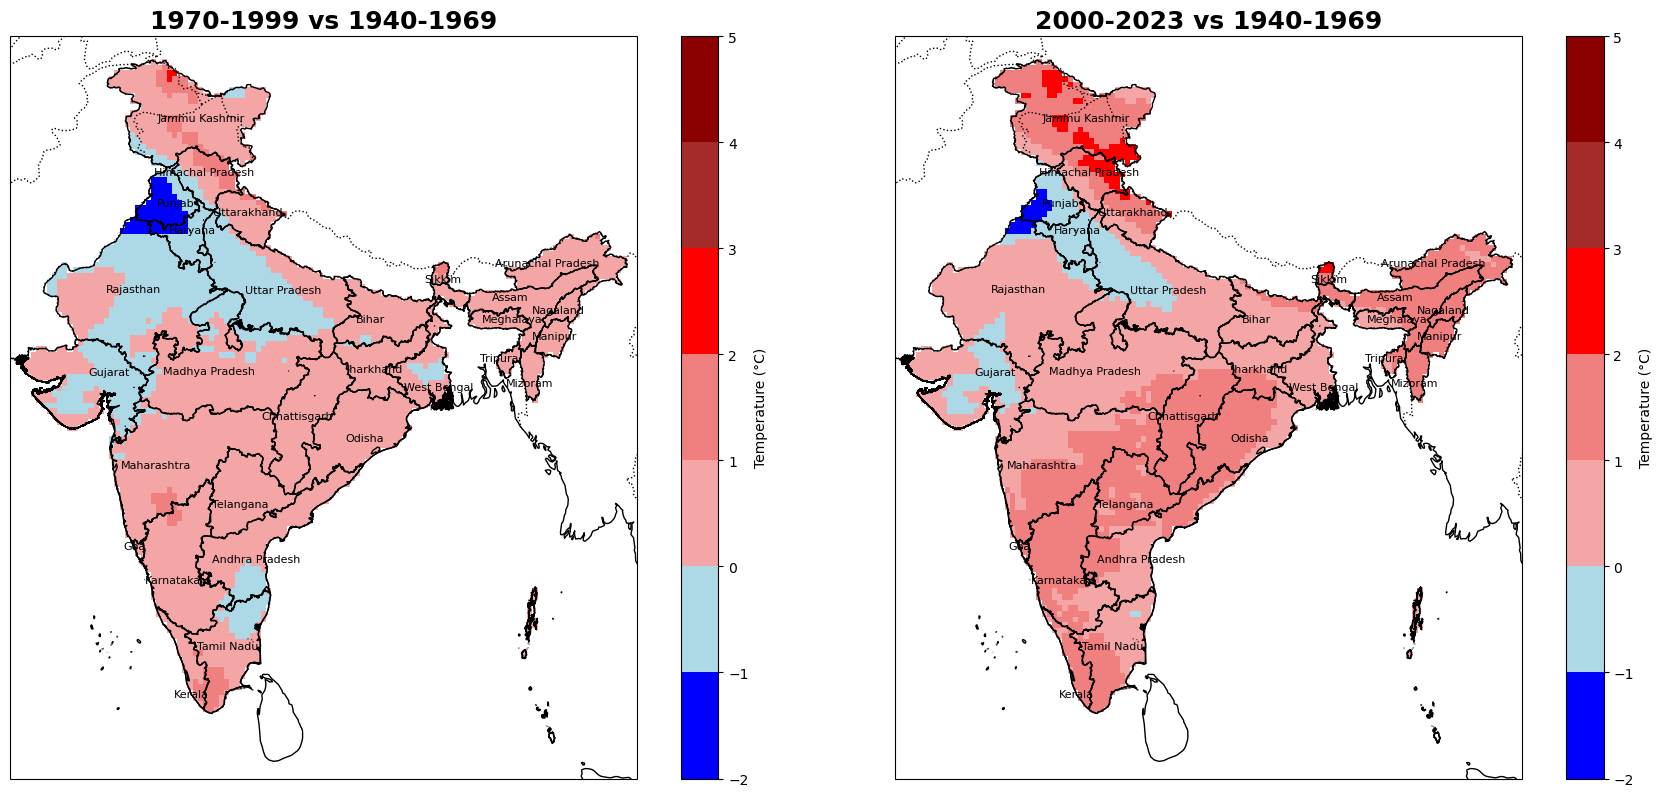

In [30]:
# Define a custom colormap with gray for zero values
cmap = mcolors.ListedColormap(['blue', 'lightblue', '#F4A6A6', 'lightcoral', 'red', 'brown', 'darkred'])
bounds = [-2,-1, 0, 1, 2, 3, 4, 5]  # Define bounds for the colormap
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), facecolor = 'none', subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969', '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_T_a, climatology_max_diff_T_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, cbar_kwargs={'label': 'Temperature (°C)', 'ticks': bounds})
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_facecolor('none')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [51]:
print(climatology_max_diff_T_a.max().values)
print(climatology_max_diff_T_a.min().values)
print(climatology_max_diff_T_b.max().values)
print(climatology_max_diff_T_b.min().values)

2.171971321105957
-1.422506332397461
2.9953489303588867
-1.7168464660644531


4.4.2 - Climatology evolution RH

In [20]:
# Calculate the differences between the climatologies
climatology_max_diff_RH_a = (climatology2_max_RH - climatology1_max_RH) 
climatology_max_diff_RH_b = (climatology3_max_RH - climatology1_max_RH) 

In [26]:
print(climatology_max_diff_RH_a.min().values)
print(climatology_max_diff_RH_b.min().values)
print(climatology_max_diff_RH_a.max().values)
print(climatology_max_diff_RH_b.max().values)

-2.800201416015625
-2.6110305786132812
13.104194641113281
17.37413787841797


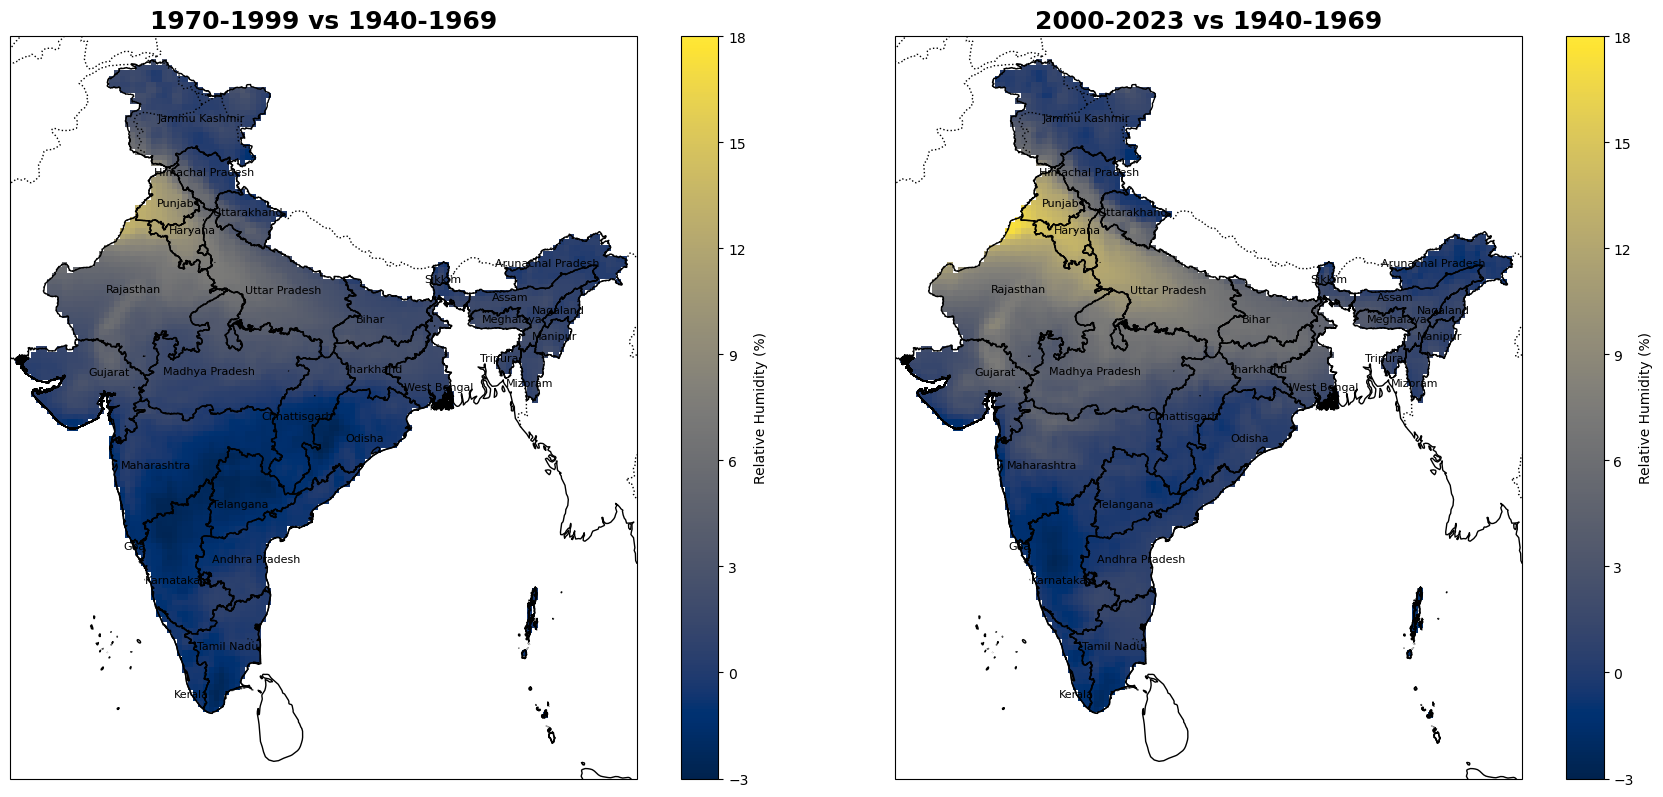

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969',
          '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_RH_a, climatology_max_diff_RH_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=-3, vmax=18, cbar_kwargs={'label': 'Relative Humidity (%)','ticks': np.linspace(-3, 18, num=8)})
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


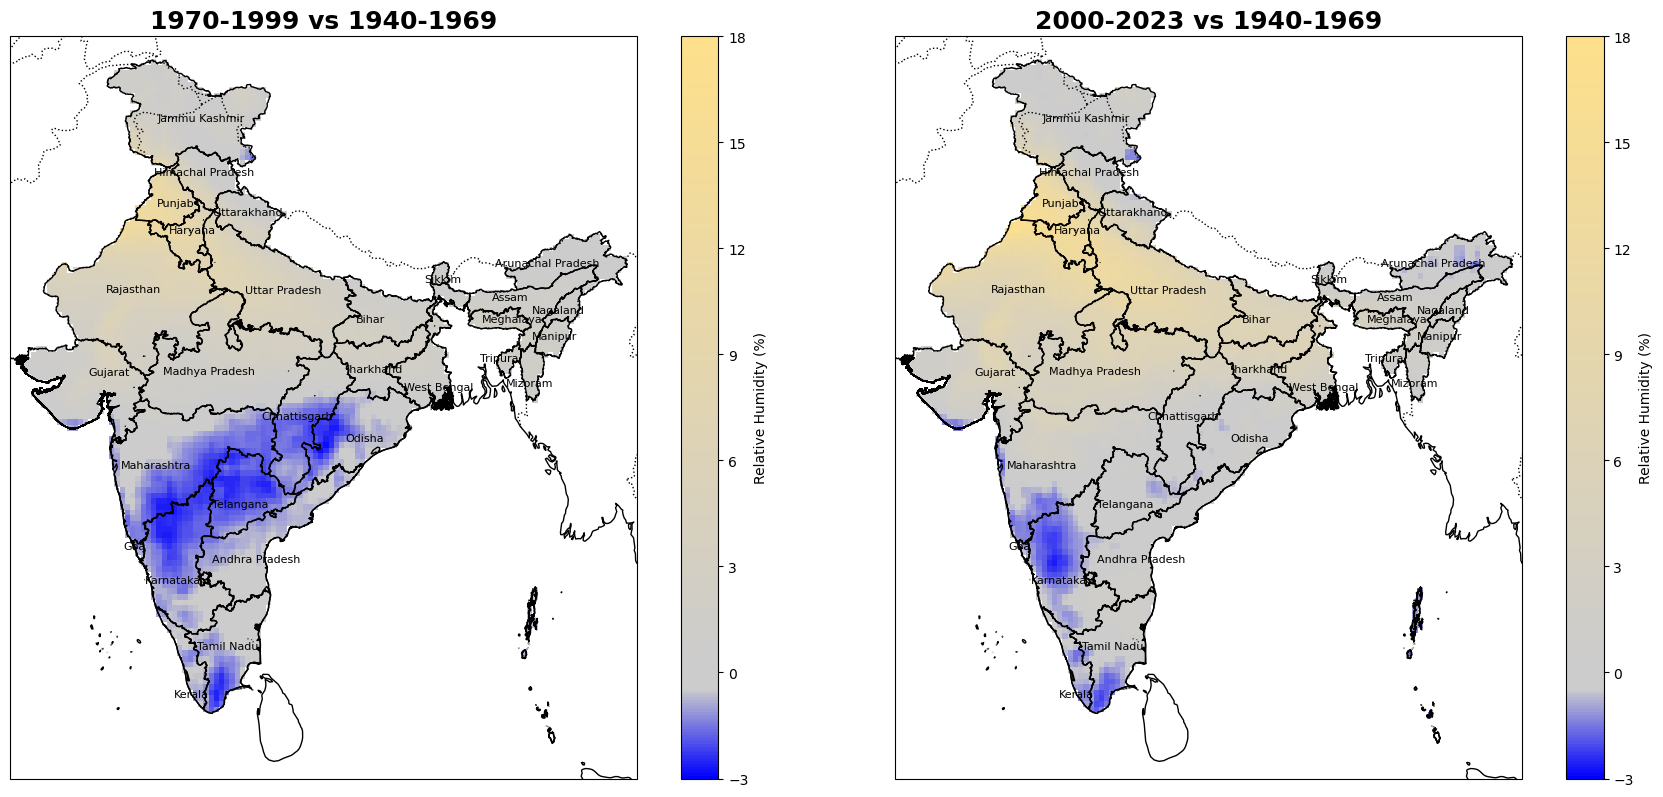

In [24]:
# Create custom colormap for RH differences
colors = ['#0000FF',  # Blue at -3%
          '#CCCCCC',  # Gray at -1%
          '#CCCCCC',  # Gray at 1%
          '#FEE08B']  # Yellow from cividis at 18%

# Define the positions of these colors on a scale from 0 to 1
positions = np.array([-3, -0.5, 0.5, 18])
positions = (positions - positions.min()) / (positions.max() - positions.min())

# Create the custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_RH', list(zip(positions, colors)))

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969', '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_RH_a, climatology_max_diff_RH_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the RH difference for the given variable
    climatology_diffs[i].plot(
        ax=ax, 
        transform=ccrs.PlateCarree(), 
        cmap=custom_cmap,
        vmin=-3,
        vmax=18,
        cbar_kwargs={
            'label': 'Relative Humidity (%)',
            'ticks': np.linspace(-3, 18, 8)
        }
    )
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

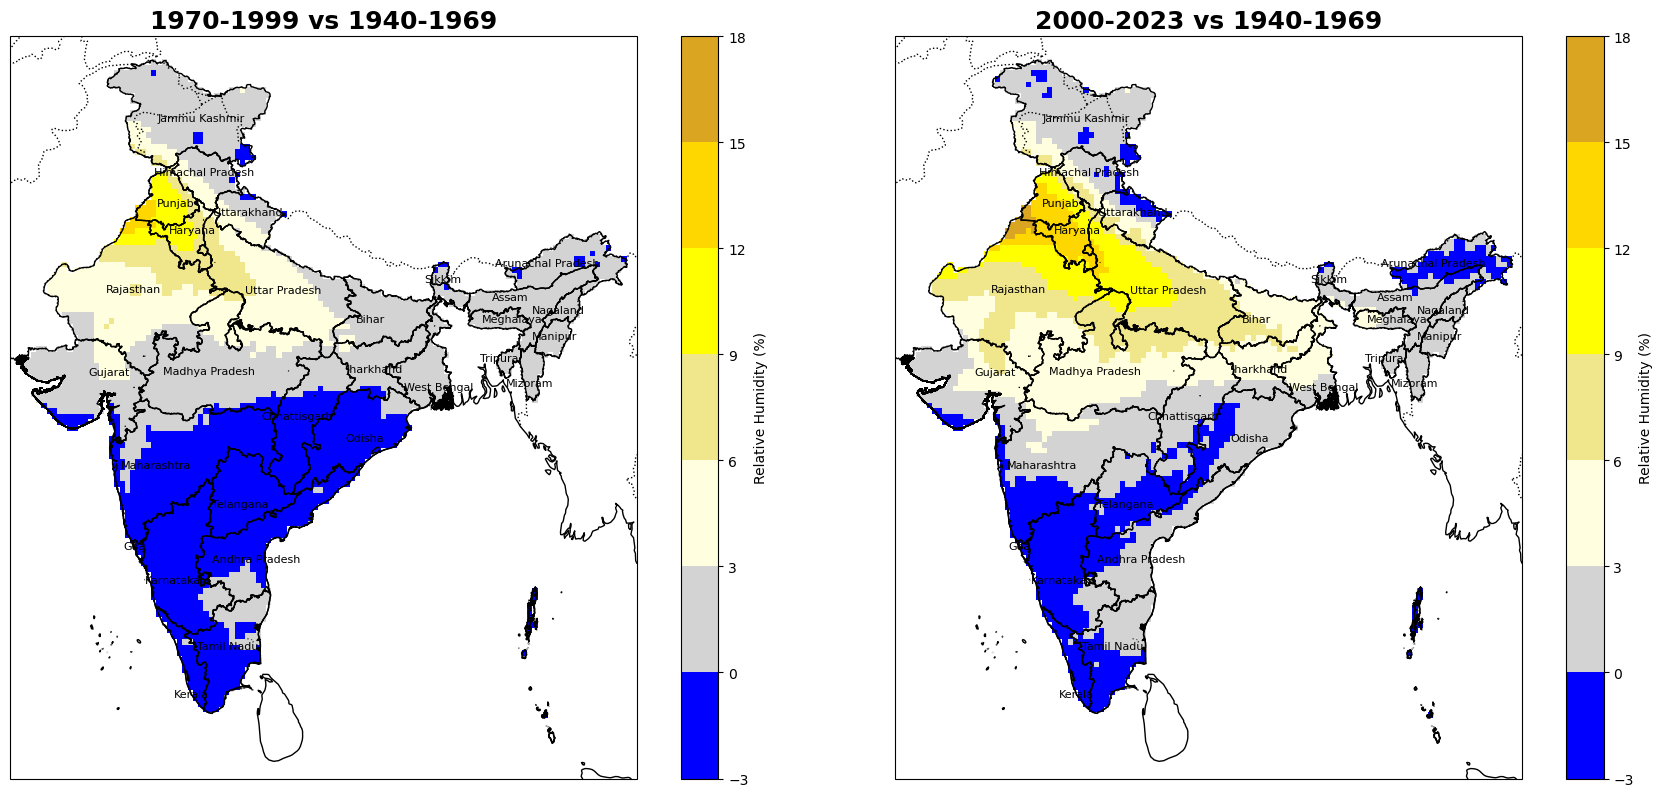

In [17]:
# Define a custom colormap with gray for zero values
cmap = mcolors.ListedColormap(['blue', 'lightgray', 'lightyellow', 'khaki', 'yellow', 'gold', 'goldenrod'])
bounds = [-3, 0, 3, 6, 9, 12, 15, 18]  # Define bounds for the colormap
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), facecolor = 'none', subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969', '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_RH_a, climatology_max_diff_RH_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, cbar_kwargs={'label': 'Relative Humidity (%)', 'ticks': bounds})
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_facecolor('none')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [32]:
print(climatology_max_diff_RH_a.max().values)
print(climatology_max_diff_RH_a.min().values)
print(climatology_max_diff_RH_b.max().values)
print(climatology_max_diff_RH_b.min().values)

13.104194641113281
-2.800201416015625
17.37413787841797
-2.6110305786132812


4.4.3 - Climatology evolution HI

In [21]:
# Calculate the differences between the climatologies
climatology_max_diff_HI_a = (climatology2_max_HI - climatology1_max_HI) 
climatology_max_diff_HI_b = (climatology3_max_HI - climatology1_max_HI) 

In [20]:
print(climatology_max_diff_HI_a.min().values)
print(climatology_max_diff_HI_b.min().values)
print(climatology_max_diff_HI_a.max().values)
print(climatology_max_diff_HI_b.max().values)

-0.5893340110778809
-0.681727409362793
2.2951629161834717
4.343177795410156


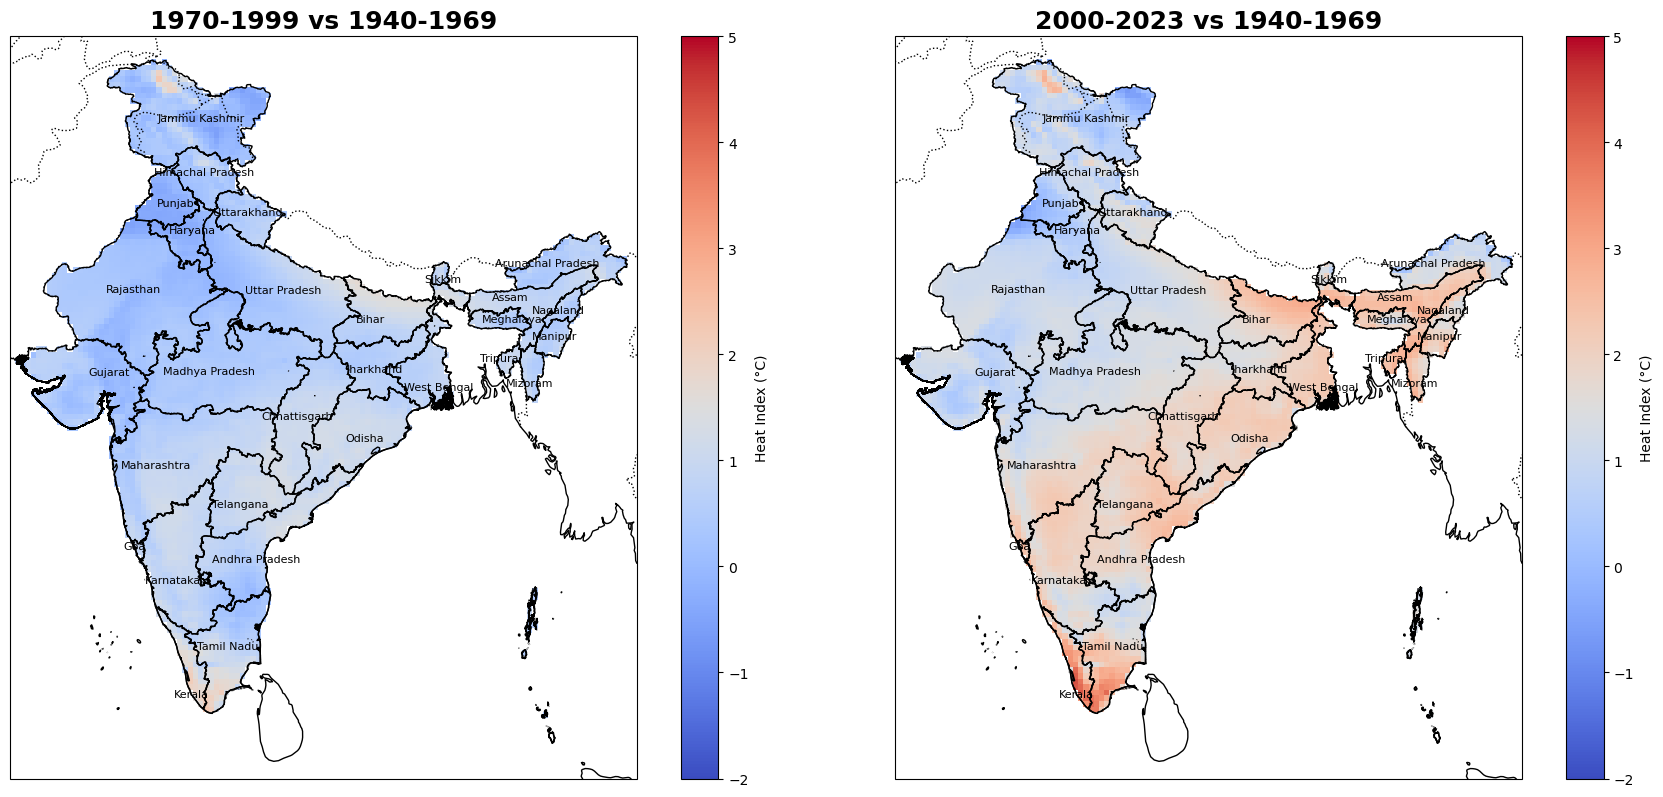

In [21]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969',
          '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_HI_a, climatology_max_diff_HI_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-2, vmax=5, cbar_kwargs={'label': 'Heat Index (°C)','ticks': np.linspace(-2, 5, num=8)})
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


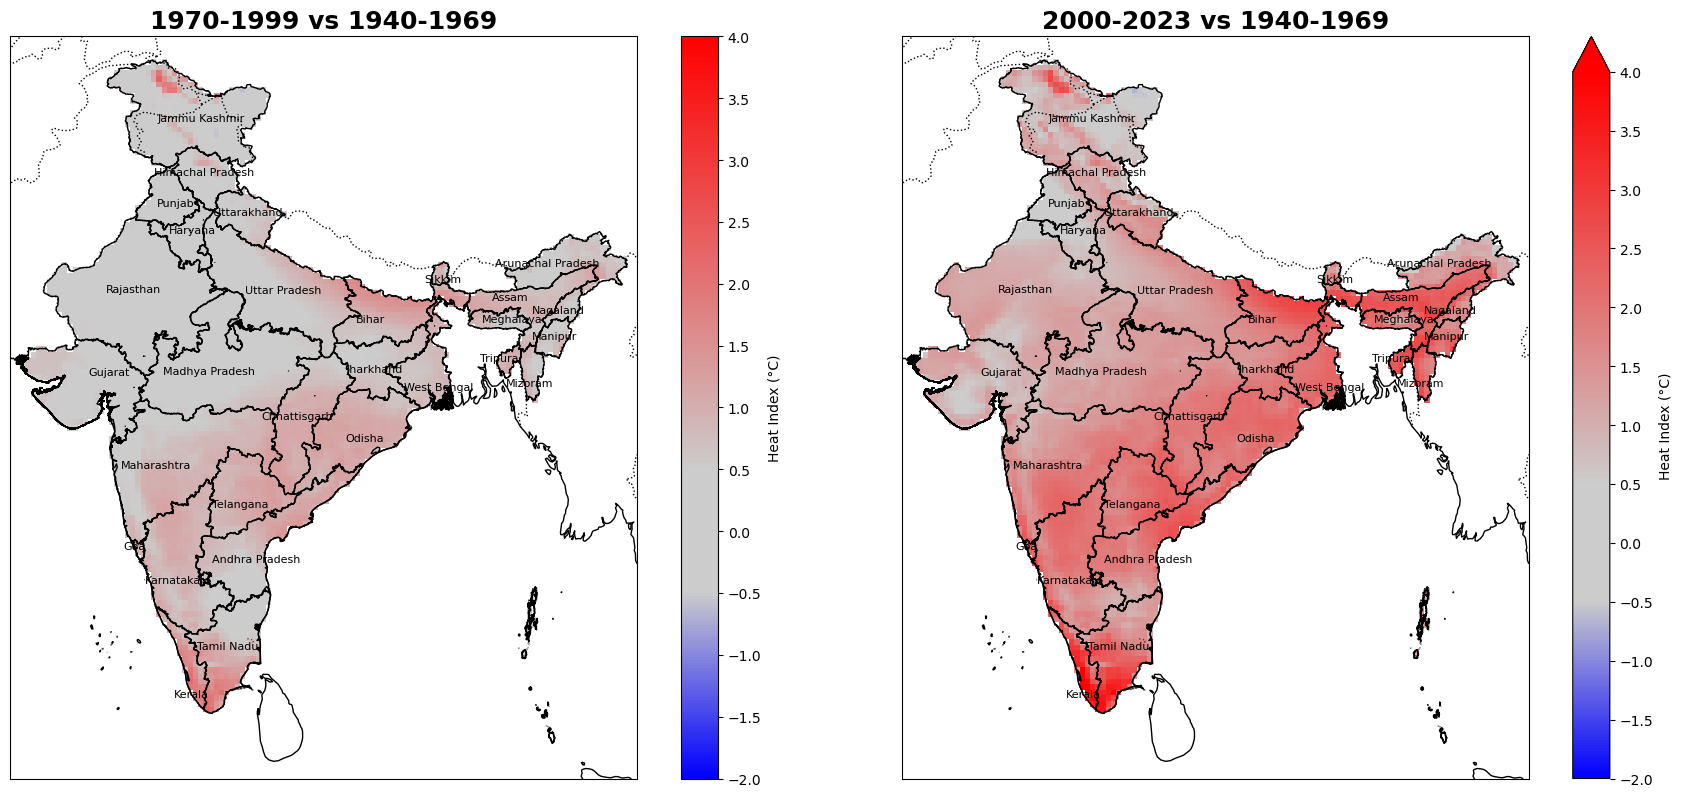

In [31]:
# Create custom colormap
colors = ['#0000FF',  # Blue at -1.5
          '#CCCCCC',  # Gray at -0.5
          '#CCCCCC',  # Gray at 0.5
          '#FF0000']  # Red at 4.0

# Define the positions of these colors on a scale from 0 to 1
positions = np.array([-2, -0.5, 0.5, 4.0])
positions = (positions - positions.min()) / (positions.max() - positions.min())

# Create the custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_coolwarm', list(zip(positions, colors)))

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969', '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_HI_a, climatology_max_diff_HI_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(
        ax=ax, 
        transform=ccrs.PlateCarree(), 
        cmap=custom_cmap,
        vmin=-2,
        vmax=4.0,
        cbar_kwargs={
            'label': 'Heat Index (°C)',
            'ticks': np.linspace(-2, 4.0, 13)
        }
    )
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

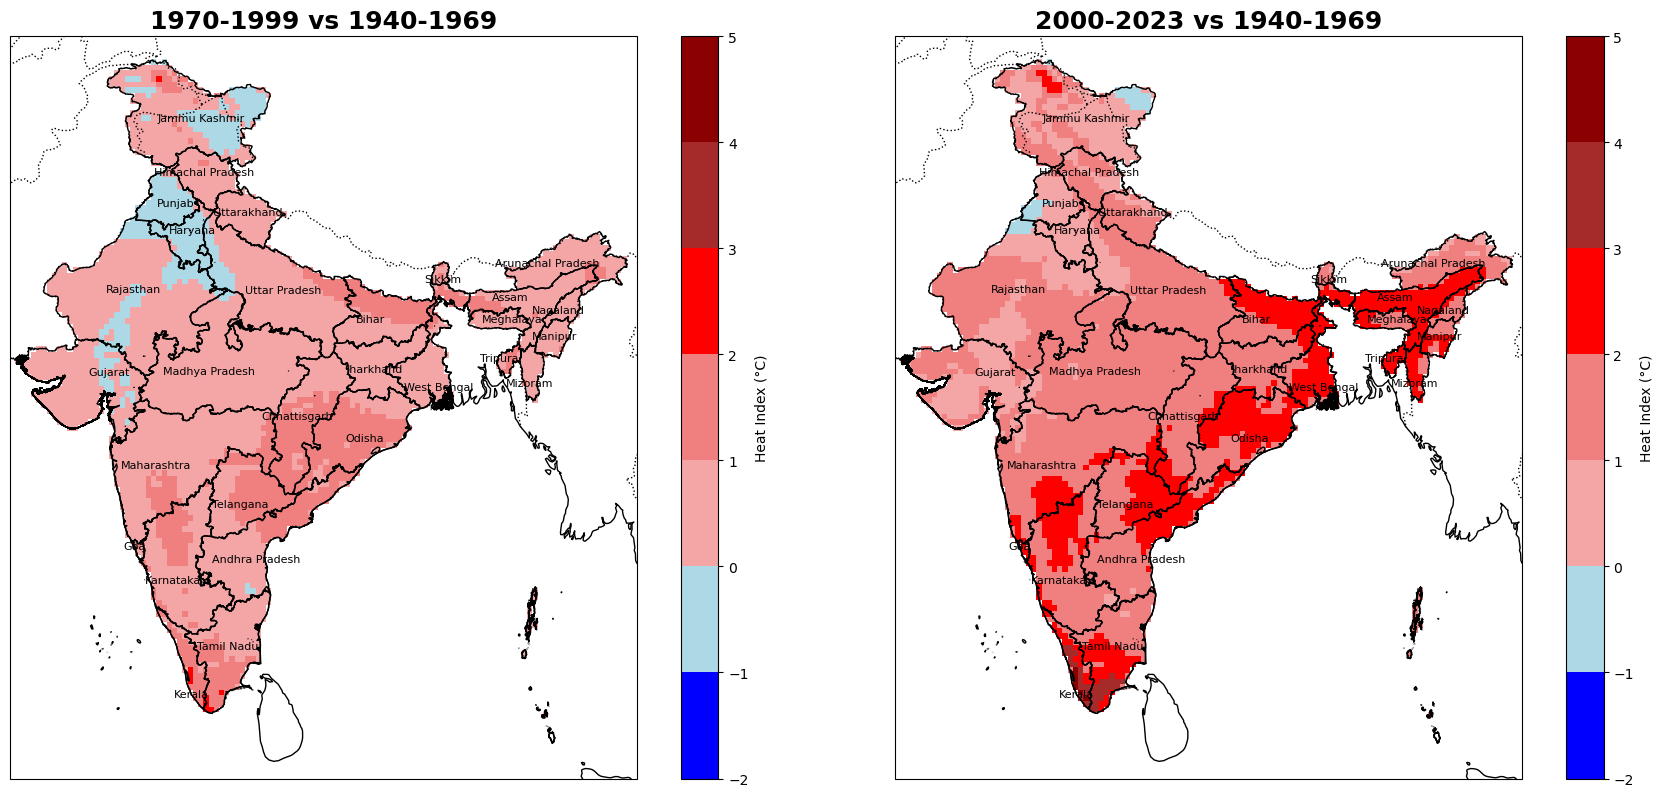

In [23]:
# Define a custom colormap with gray for zero values
cmap = mcolors.ListedColormap(['blue', 'lightblue', '#F4A6A6', 'lightcoral', 'red', 'brown', 'darkred'])
bounds = [-2,-1, 0, 1, 2, 3, 4, 5]  # Define bounds for the colormap
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), facecolor='none', subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for each subplot
titles = ['1970-1999 vs 1940-1969', '2000-2023 vs 1940-1969']

# List of climatology difference datasets to plot
climatology_diffs = [climatology_max_diff_HI_a, climatology_max_diff_HI_b]

# Plot each climatology difference on the subplots
for i, ax in enumerate(axes):
    # Plot the temperature difference for the given variable
    climatology_diffs[i].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, cbar_kwargs={'label': 'Heat Index (°C)', 'ticks': bounds})
    
    # Plot city points and labels
    for _, row in capitals_df.iterrows():
        ax.text(row["Longitude"], row["Latitude"], row["State"],
                transform=ccrs.PlateCarree(), fontsize=8, color='black',
                horizontalalignment='center', verticalalignment='center', zorder=10)

    # Add Indian state boundaries from the shapefile
    Indian_states.boundary.plot(ax=ax, color='black', linewidth=1)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set title and axis labels
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_facecolor('none')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [24]:
print(climatology_max_diff_HI_a.max().values)
print(climatology_max_diff_HI_a.min().values)
print(climatology_max_diff_HI_b.max().values)
print(climatology_max_diff_HI_b.min().values)

2.2951629161834717
-0.5893340110778809
4.343177795410156
-0.681727409362793


---
4.5 - Graphic evolution on mean(daily maximum)

In [28]:
T_daily_yearly_max = T_daily['daily_max_temp'].mean(dim=['latitude', 'longitude']).groupby('time.year').mean()
HI_daily_yearly_max = HI_daily['daily_max_HI'].mean(dim=['latitude', 'longitude']).groupby('time.year').mean()
RH_daily_yearly_max = RH_daily['daily_max_RH'].mean(dim=['latitude', 'longitude']).groupby('time.year').mean()


In [29]:
print(T_daily_yearly_max.mean().values)
print(RH_daily_yearly_max.mean().values)
print(HI_daily_yearly_max.mean().values)

27.546776
77.63263
30.60855


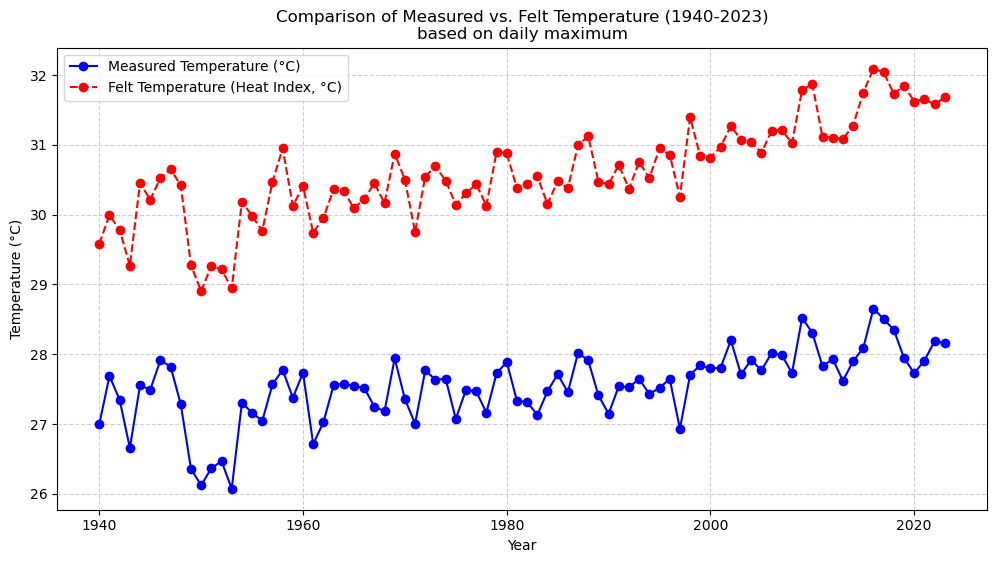

In [30]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot measured temperature (T_stat_yearly_max)
plt.plot(T_daily_yearly_max.year, T_daily_yearly_max, label="Measured Temperature (°C)", color='blue', linestyle='-', marker='o')

# Plot felt temperature (HI_stat_yearly)
plt.plot(HI_daily_yearly_max.year, HI_daily_yearly_max, label="Felt Temperature (Heat Index, °C)", color='red', linestyle='--', marker='o')

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Comparison of Measured vs. Felt Temperature (1940-2023)\nbased on daily maximum")

# Add Grid and Legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the Plot
plt.show()

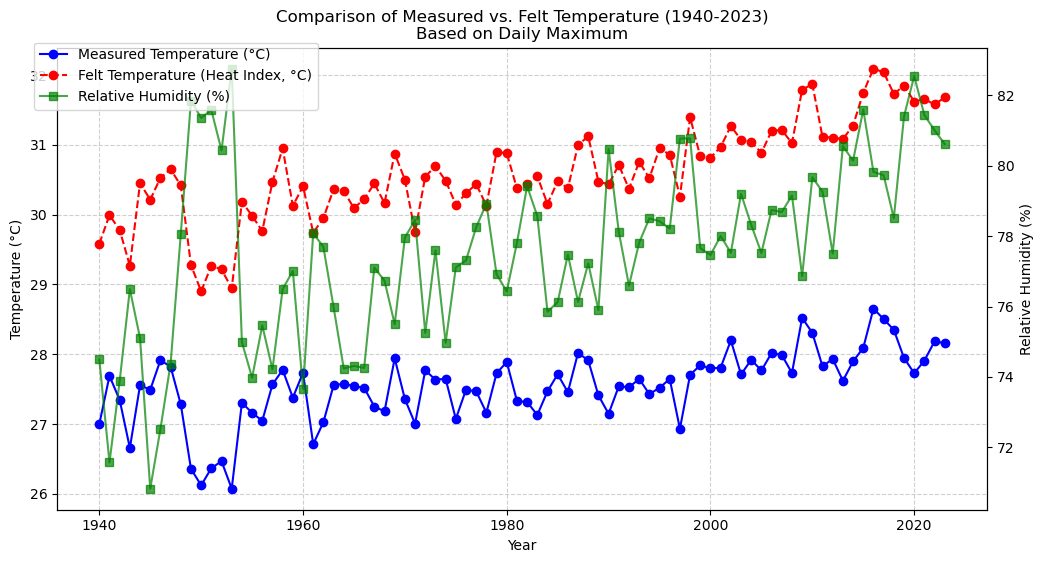

In [31]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot measured and felt temperatures on the primary y-axis (left)
ax1.plot(T_daily_yearly_max.year, T_daily_yearly_max, label="Measured Temperature (°C)", color='blue', linestyle='-', marker='o')
ax1.plot(HI_daily_yearly_max.year, HI_daily_yearly_max, label="Felt Temperature (Heat Index, °C)", color='red', linestyle='--', marker='o')

# Labels for primary y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature (°C)")
ax1.set_title("Comparison of Measured vs. Felt Temperature (1940-2023)\nBased on Daily Maximum")

# Create a secondary y-axis for relative humidity
ax2 = ax1.twinx()
ax2.plot(RH_daily_yearly_max.year, RH_daily_yearly_max, label="Relative Humidity (%)", color='green', linestyle='-', marker='s', alpha=0.7)

# Labels for secondary y-axis
ax2.set_ylabel("Relative Humidity (%)")

# Grid and Legends
ax1.grid(True, linestyle='--', alpha=0.6)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()
